# Title: Analyzing Global Life Expectancy Factors: A Comprehensive Regression Model Approach

## Business problem

The problem addressed in the business context is to develop a regression model that analyzes the factors influencing life expectancy across 193 countries from 2000 to 2015. The goal is to identify the key predictors that significantly impact life expectancy, taking into account immunization, mortality, economic, and social factors. The study aims to fill the gap left by previous research, which did not adequately consider the influence of immunization and human development index, and often relied on single-year data, potentially overlooking long-term trends.

Additionally, the presence of missing data, particularly in variables such as population, Hepatitis B, and GDP, poses a challenge to the analysis. Some less-known countries lacked sufficient data, making it difficult to include them in the final dataset. Managing missing data is crucial to ensure the accuracy and reliability of the regression model's outcomes.

The ultimate objective is to provide actionable insights to countries, suggesting areas where they should focus their efforts and resources to efficiently improve the life expectancy of their populations. By understanding the significant factors contributing to life expectancy variations, governments and global health organizations can design targeted interventions and policies, potentially leading to better health outcomes worldwide.

## Data Collection and Preparation:

We sourced the data from the Global Health Observatory (GHO) data repository under the World Health Organization (WHO) and supplemented it with economic data from the United Nations website. The dataset consists of health-related factors deemed critical for analysis, carefully selected to ensure representativeness. Over the 15-year study period, significant advancements in the health sector have resulted in improved human mortality rates, particularly in developing nations. This progress is especially noteworthy when compared to the past three decades.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import kruskal
from scipy.stats import pearsonr
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import plotly.express as px

In [2]:
df = pd.read_csv('Life_Expectancy-Data_Updated.csv')

In [3]:
df1 = df.copy()

# Exploratory Data Analysis

In [4]:
df1.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

In [5]:
df1.shape

(2864, 21)

In [6]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [7]:
df1.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [8]:
df1.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

In [9]:
print(df1.duplicated().sum()) 

0


# Scatter Plot

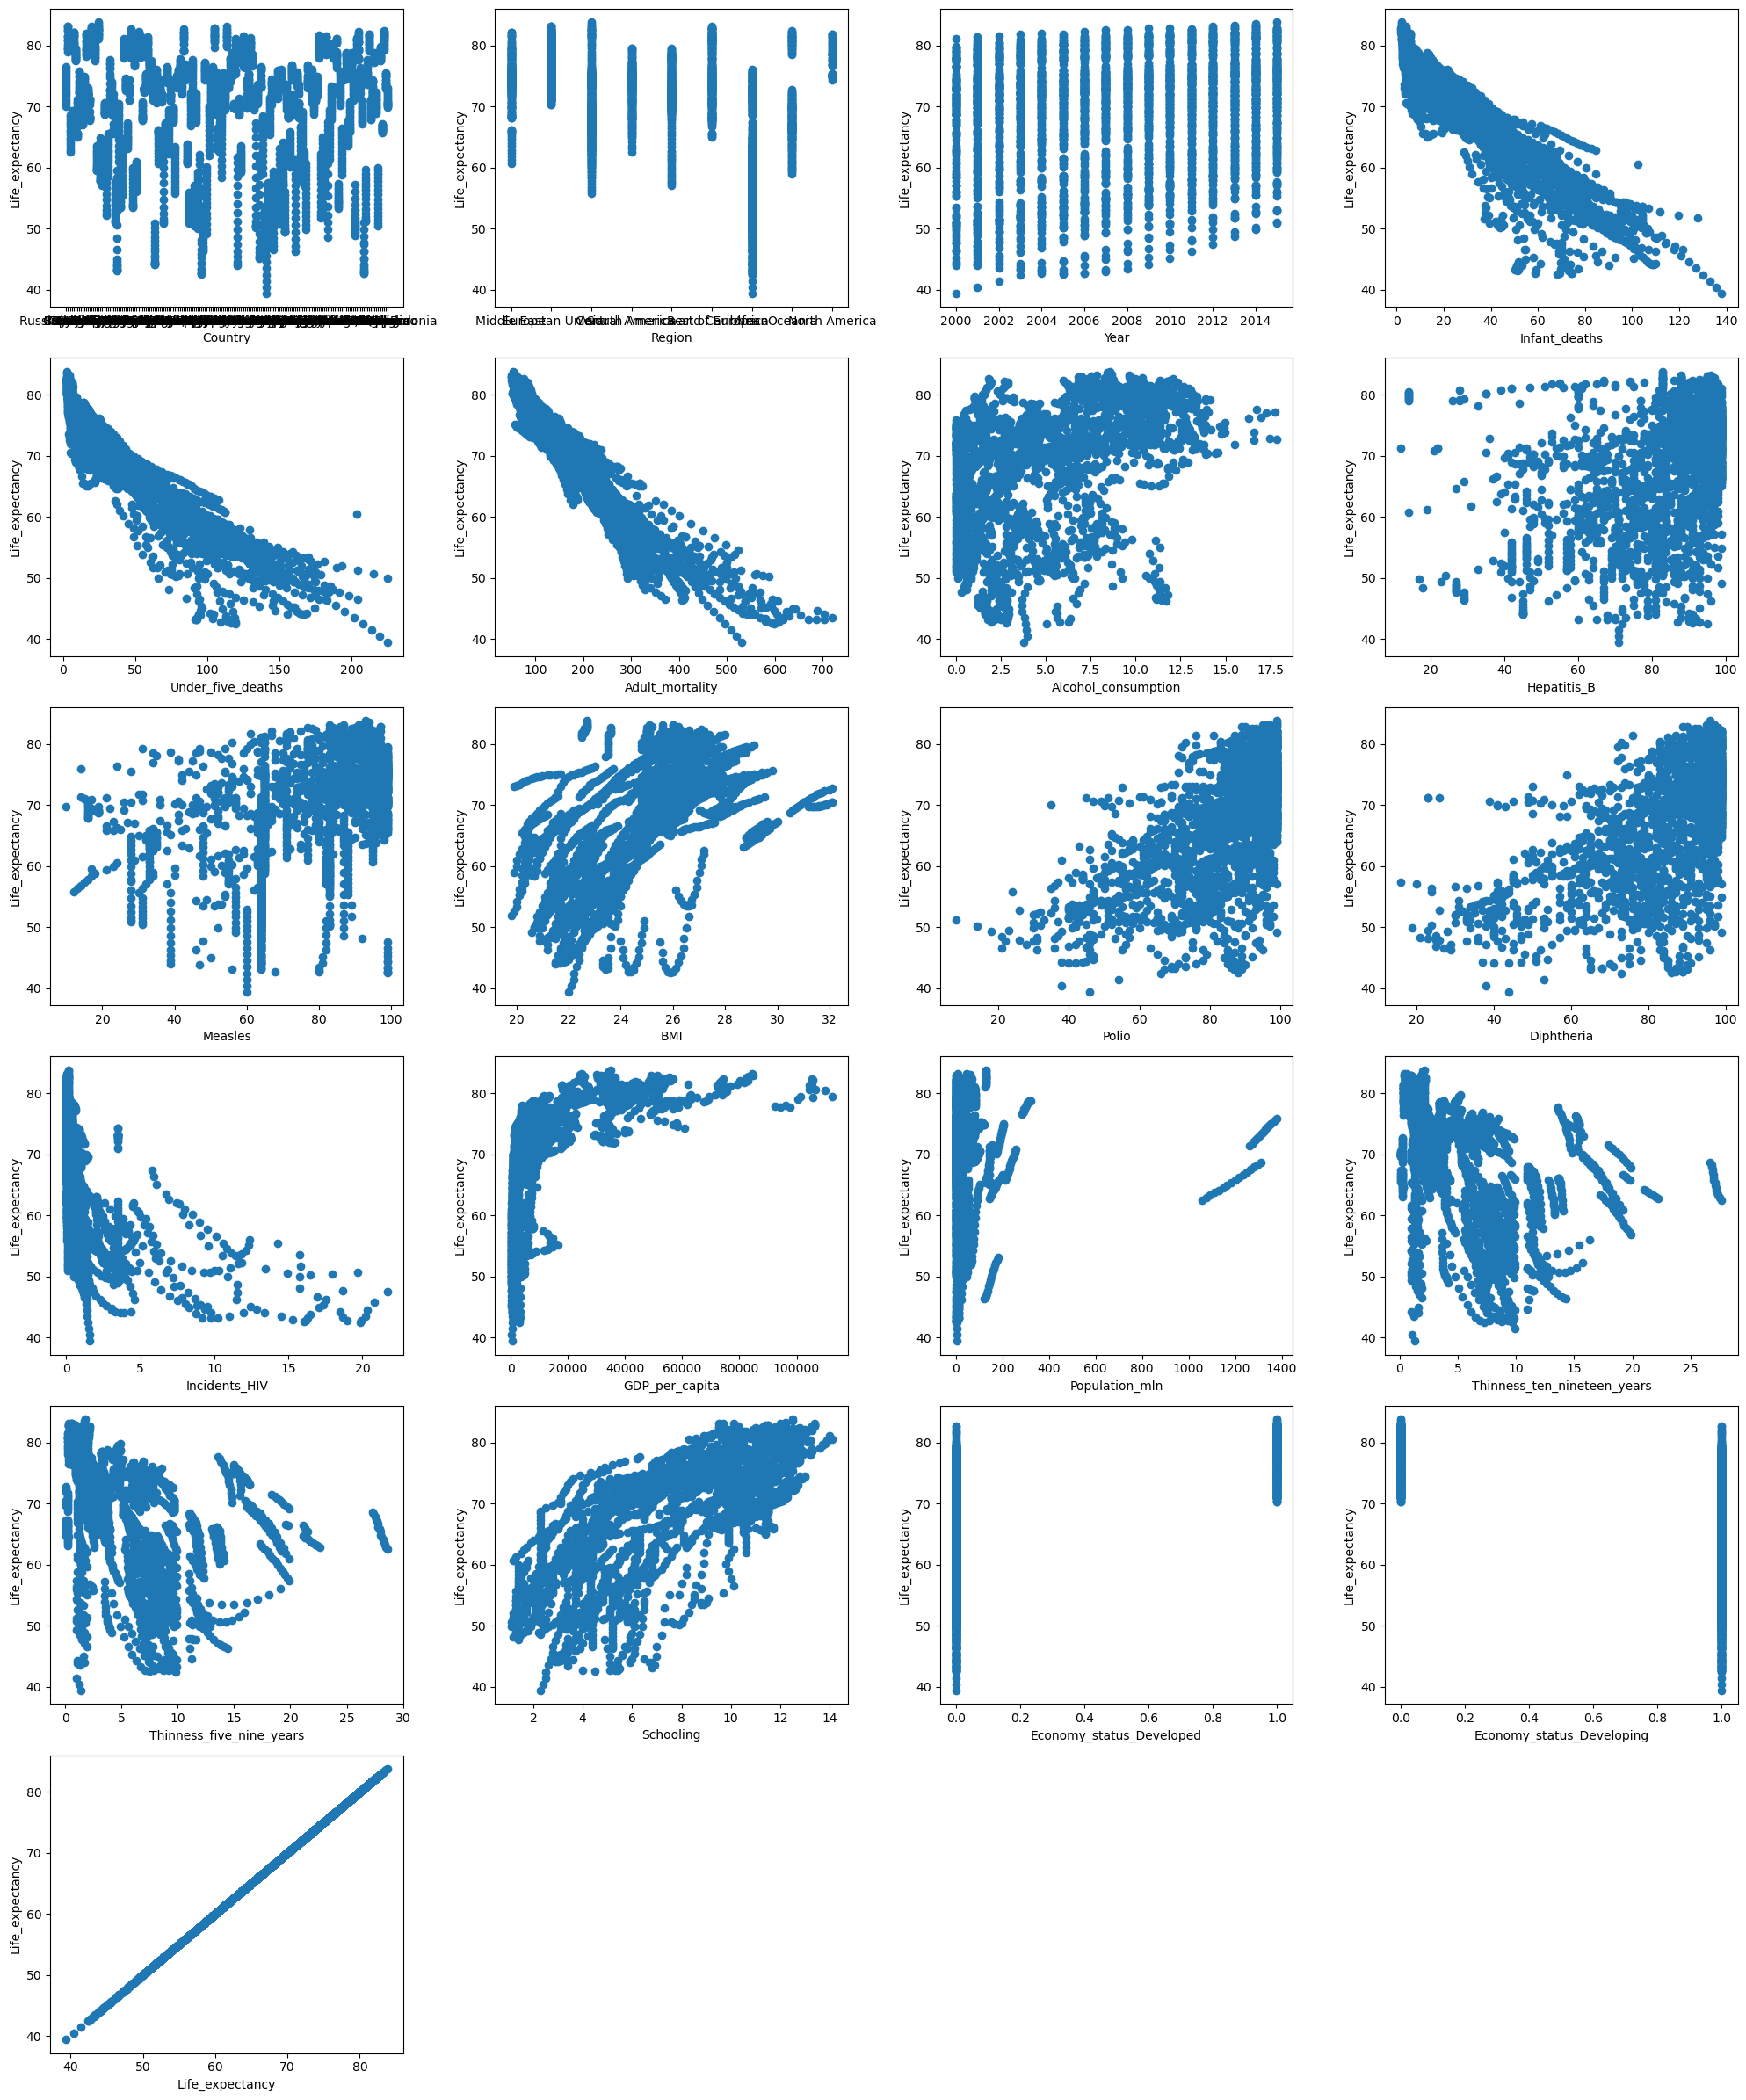

In [10]:


num_cols = len(df1.columns)
num_rows = (num_cols - 1) // 4 + 1

fig, axs = plt.subplots(num_rows, 4, figsize=(20, 4 * num_rows))
axs = axs.flatten()

# Iterate over the columns of the DataFrame and create scatter plots
columns = df1.columns
for i, col in enumerate(columns):
    axs[i].scatter(df[col], df1['Life_expectancy'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Life_expectancy')

# Remove any unused subplots
for j in range(num_cols, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

# Disturbution of the data

In [11]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True, orient='h')
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


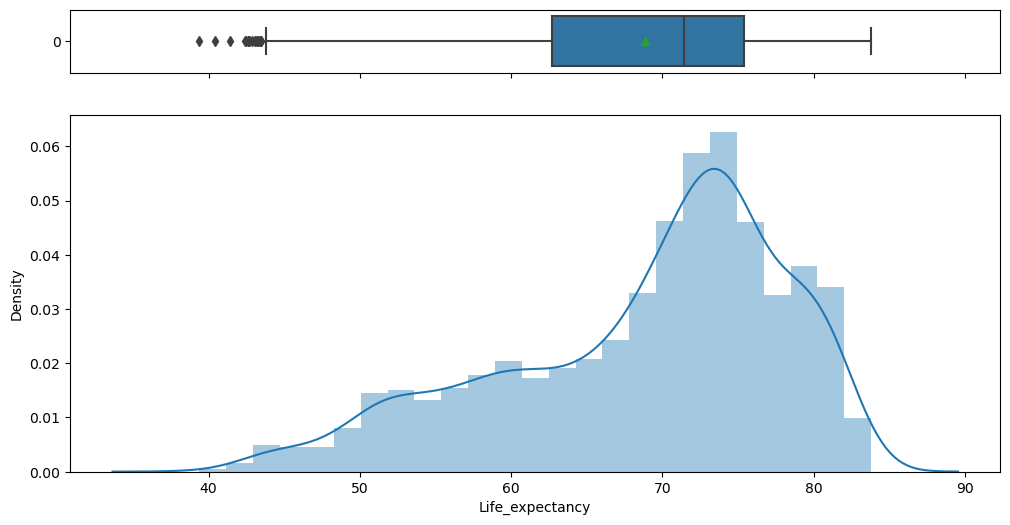

In [12]:
hist_box(df1, 'Life_expectancy')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


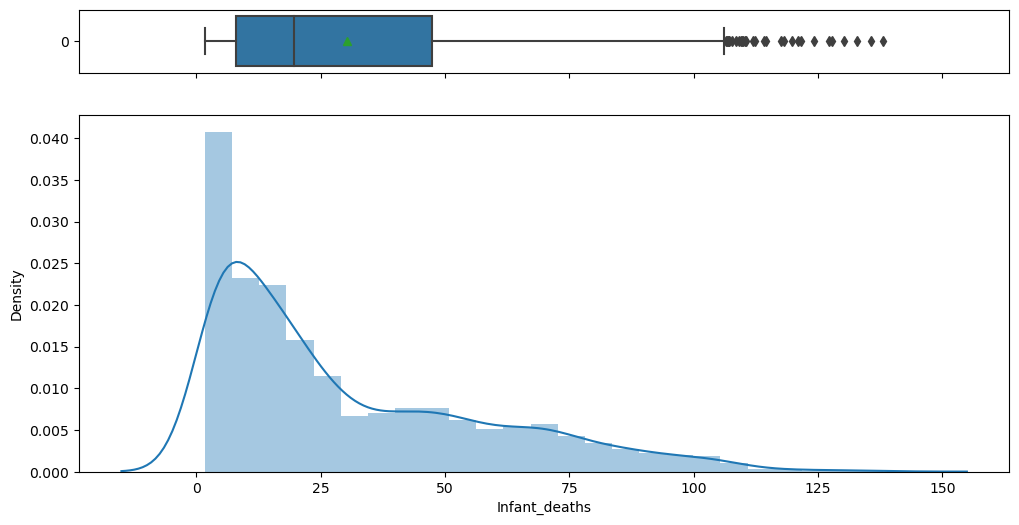

In [13]:
hist_box(df1, 'Infant_deaths')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


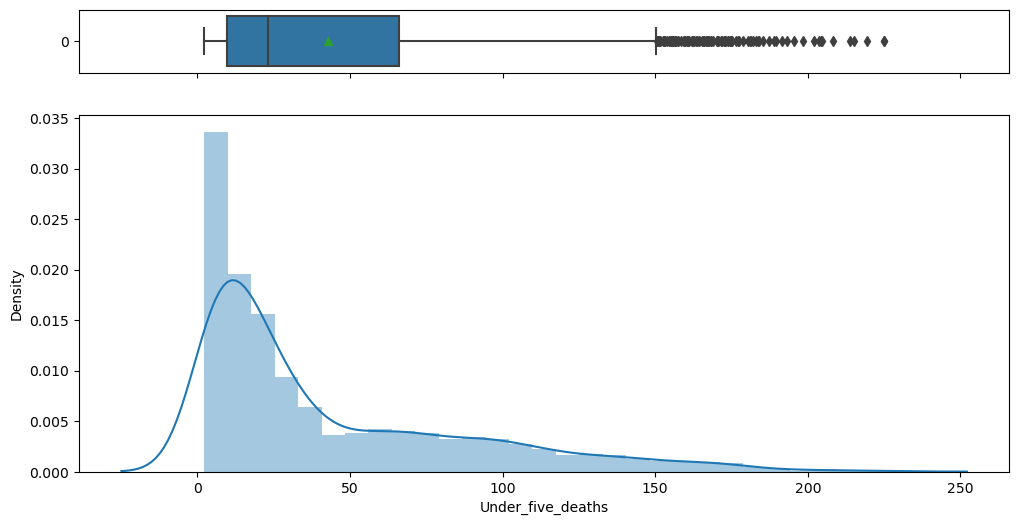

In [14]:
hist_box(df1, 'Under_five_deaths')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


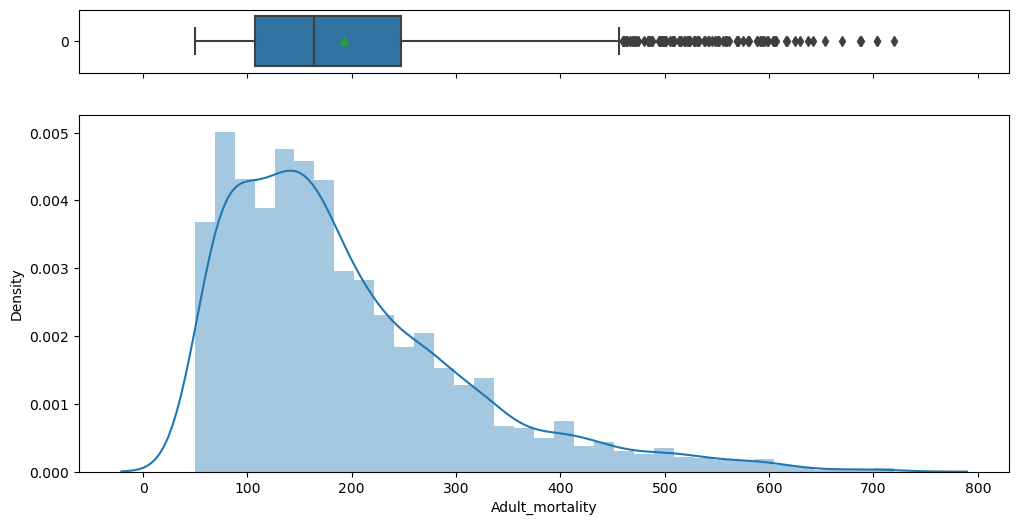

In [15]:
hist_box(df1, 'Adult_mortality')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


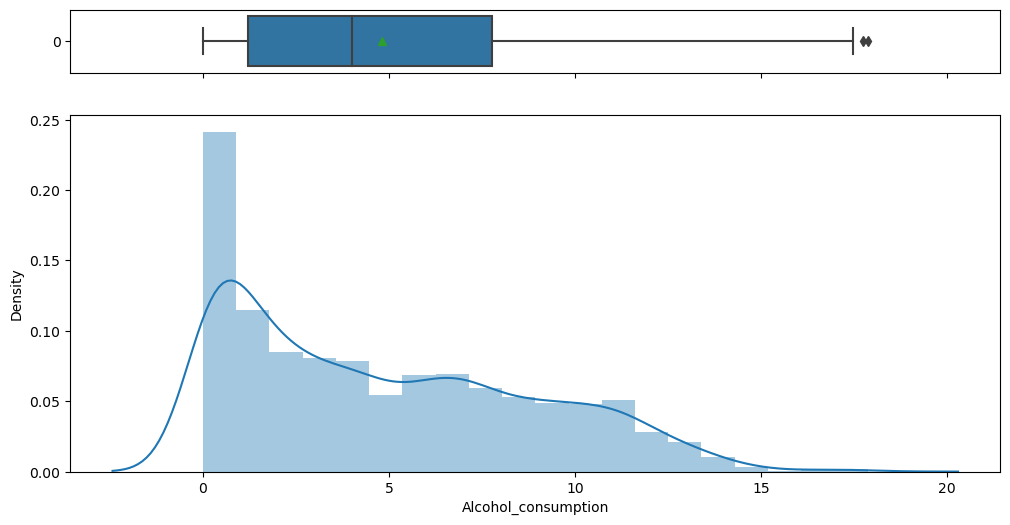

In [16]:
hist_box(df1, 'Alcohol_consumption')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


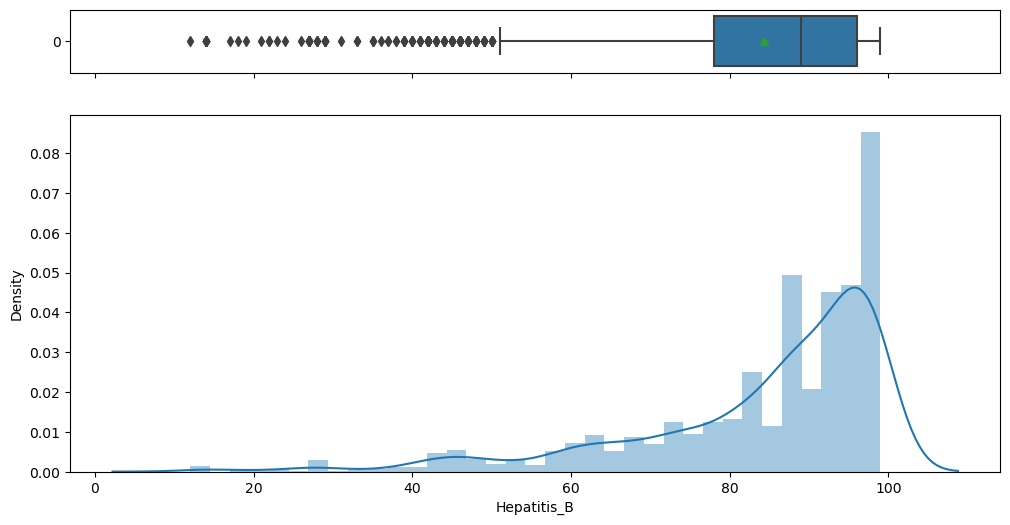

In [17]:
hist_box(df1, 'Hepatitis_B')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


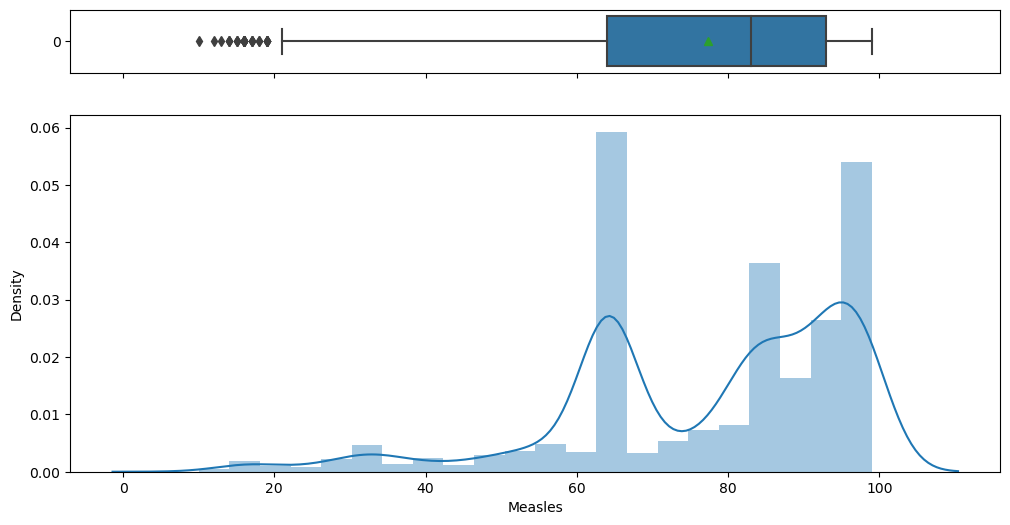

In [18]:
hist_box(df1, 'Measles')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


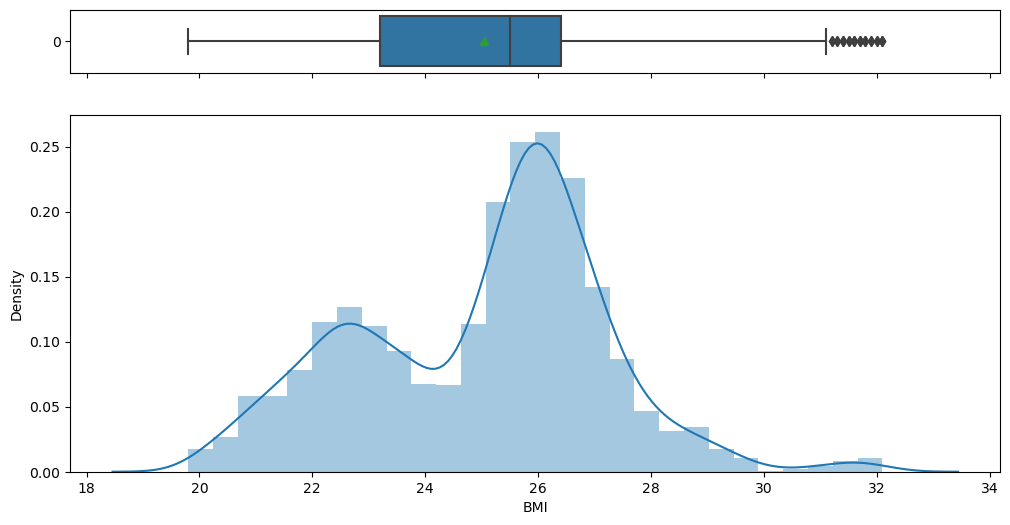

In [19]:
hist_box(df1, 'BMI')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


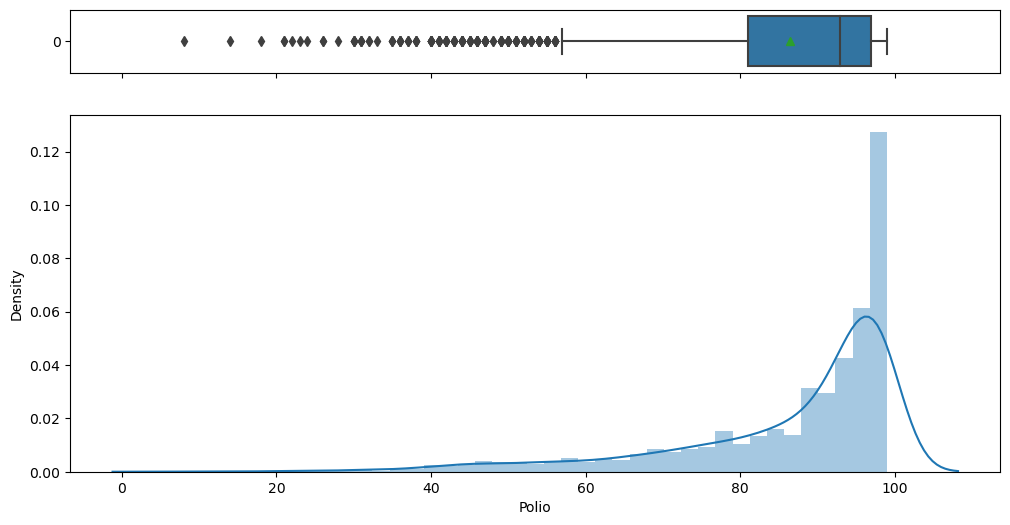

In [20]:
hist_box(df1, 'Polio')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


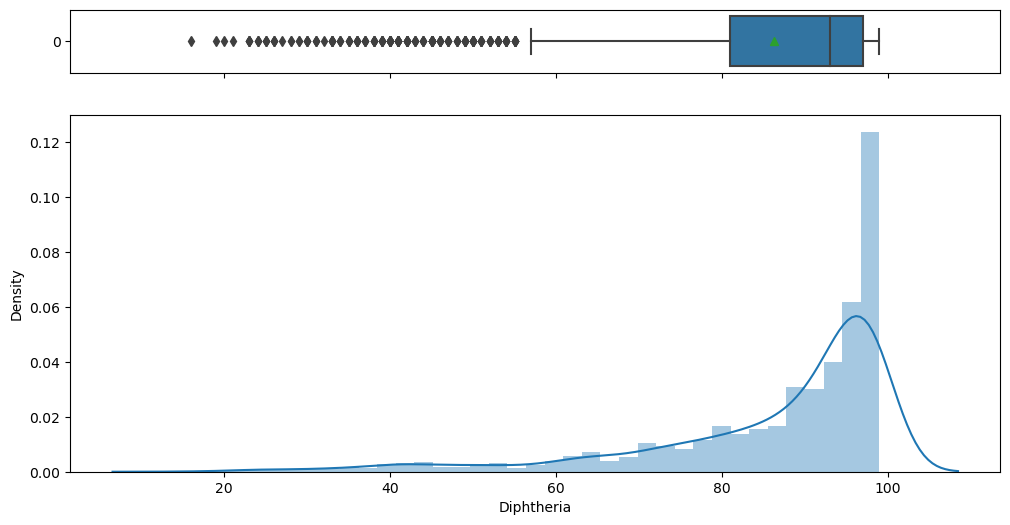

In [21]:
hist_box(df1, 'Diphtheria')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


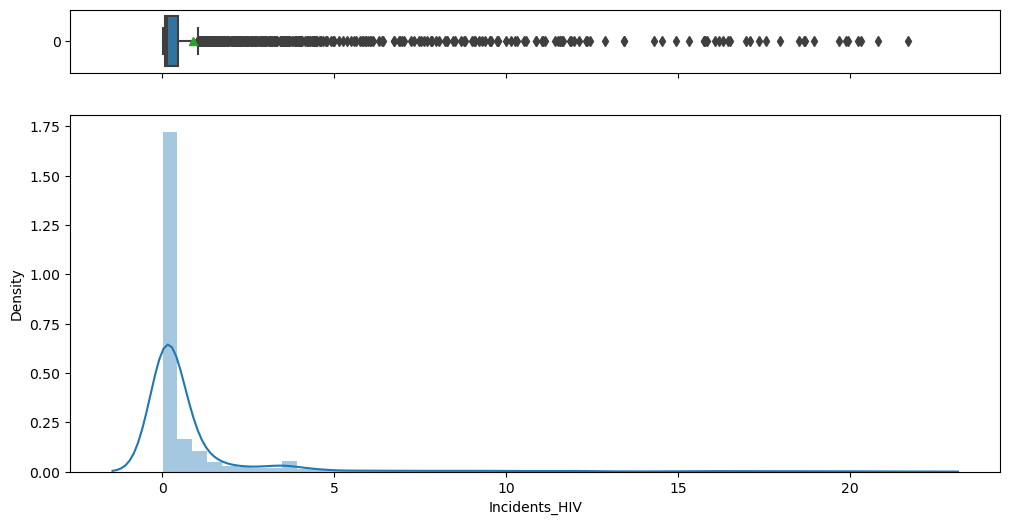

In [22]:
hist_box(df1, 'Incidents_HIV')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


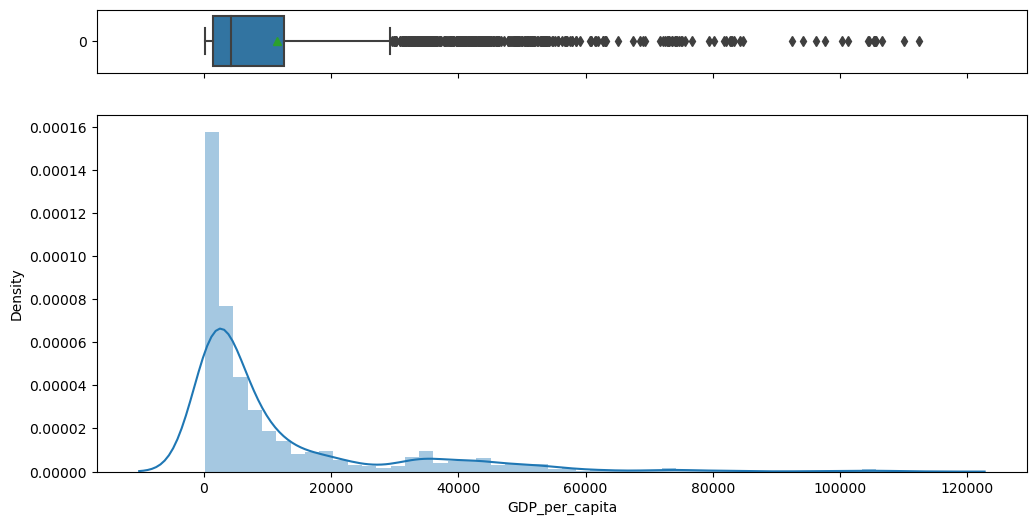

In [23]:
hist_box(df1, 'GDP_per_capita')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


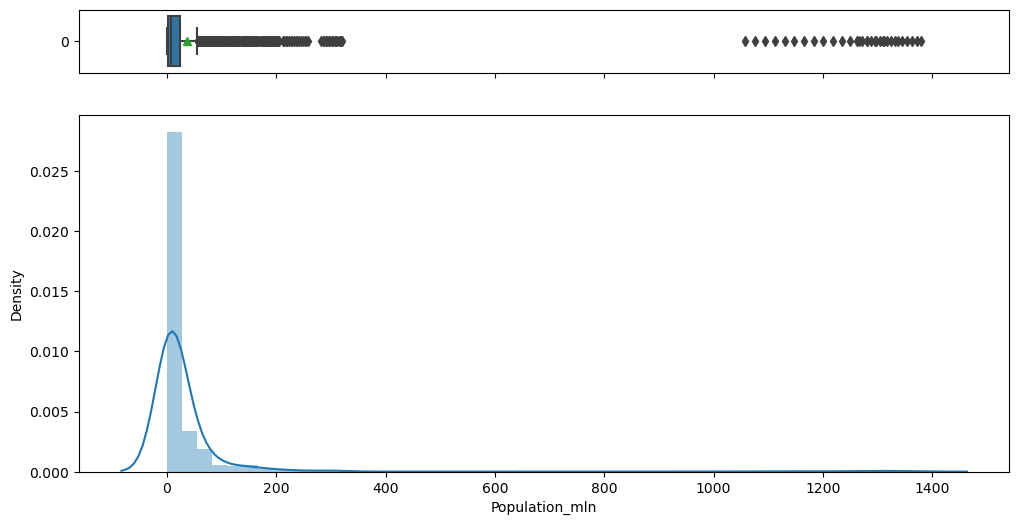

In [24]:
hist_box(df1, 'Population_mln')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


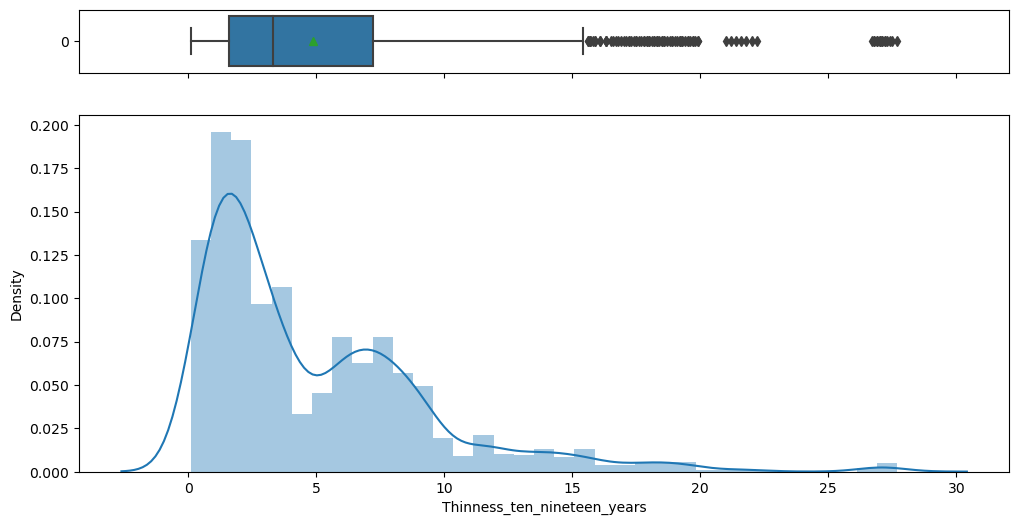

In [25]:
hist_box(df1, 'Thinness_ten_nineteen_years')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


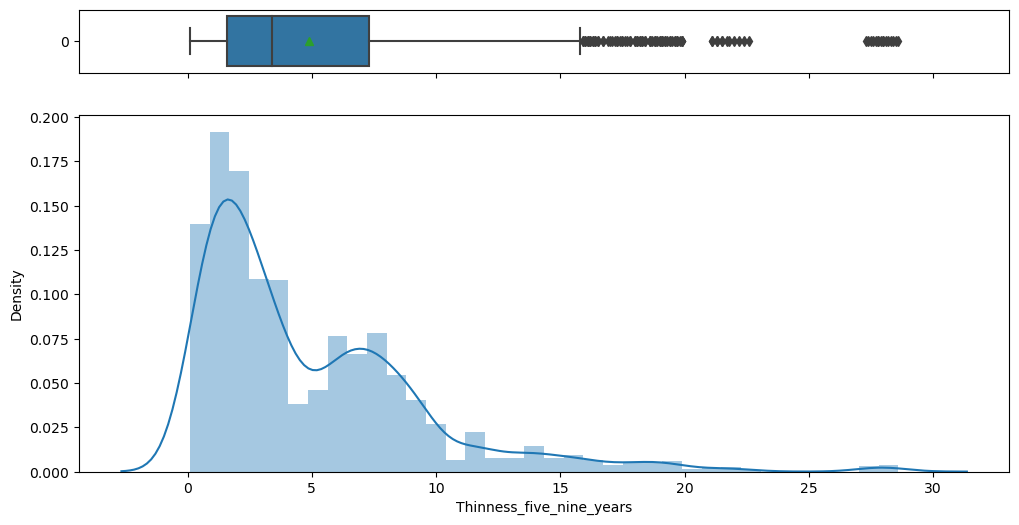

In [26]:
hist_box(df1, 'Thinness_five_nine_years')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


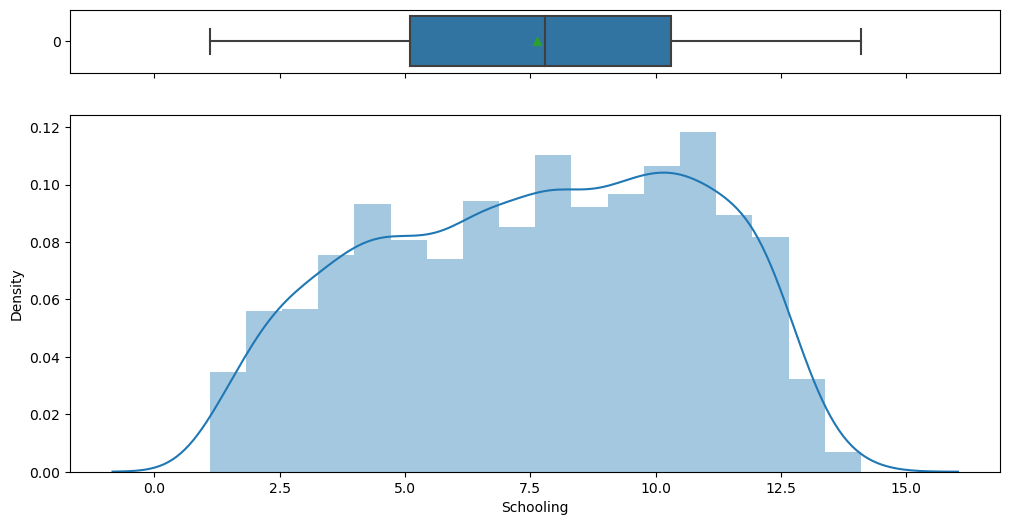

In [27]:
hist_box(df1, 'Schooling')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


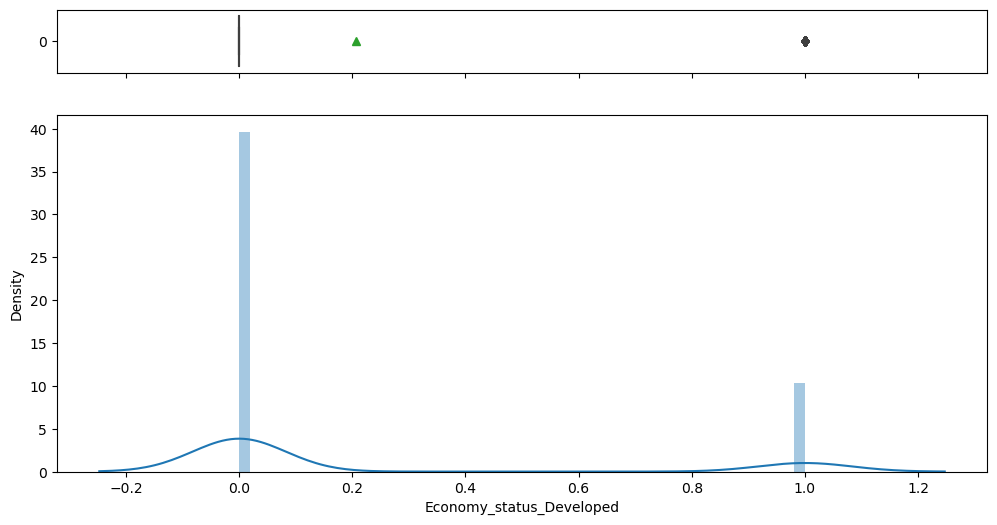

In [28]:
hist_box(df1, 'Economy_status_Developed')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


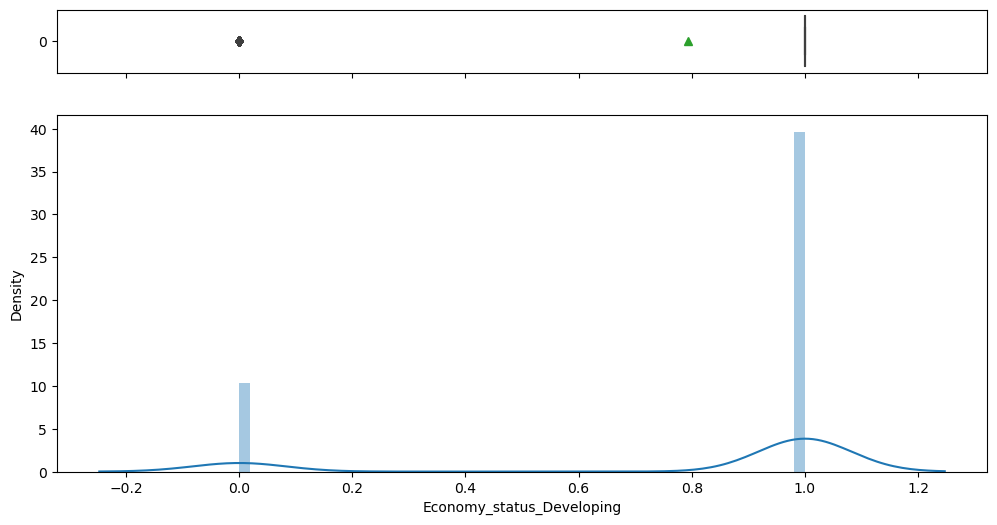

In [29]:
hist_box(df1, 'Economy_status_Developing')

# Baseline Model- Iteration 1

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     8817.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:58:19   Log-Likelihood:                -4955.8
No. Observations:                2864   AIC:                             9944.
Df Residuals:                    2848   BIC:                         1.004e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

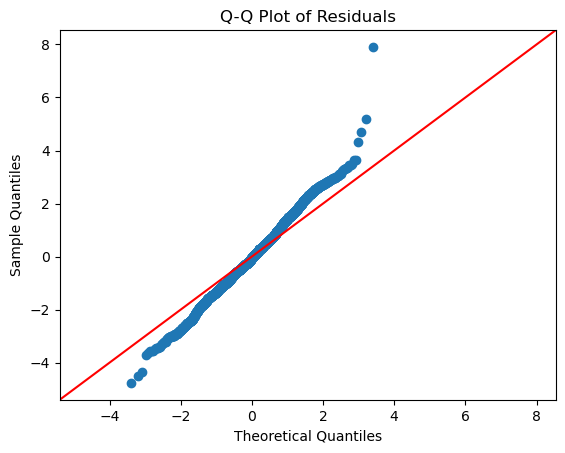

In [79]:
# Select relevant columns
independent_vars = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
                    'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
                    'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
                    'Thinness_five_nine_years', 'Schooling']

dependent_var = 'Life_expectancy'

# Prepare the data
X = df1[independent_vars]
y = df1[dependent_var]

# Add a constant term for the intercept in the model
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Print regression summary
print(results.summary())

# Calculate residuals
predicted_values = results.predict(X)
residuals = y - predicted_values

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predicted_values)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Create Q-Q plot of residuals
fig, ax = plt.subplots()
sm.qqplot(residuals, line='45', ax=ax)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Iteration 2

In [31]:
df2 = df1.copy()

### Log Transformation
In addition to the previous code, we performed log transformations to improve the distribution of the data for certain variables in 'df2'. Log transformations are commonly used to stabilize variance and address skewed data, making the data more suitable for regression analysis.

In [32]:
df2['Infant_deaths'] = np.log(df2['Infant_deaths'])
df2['Under_five_deaths'] = np.log(df2['Under_five_deaths'])
df2['Adult_mortality'] = np.log(df2['Adult_mortality'])
df2['Hepatitis_B'] = np.log(df2['Hepatitis_B'])
df2['Measles'] = np.log(df2['Measles'])
df2['Polio'] = np.log(df2['Polio'])
df2['Diphtheria'] = np.log(df2['Diphtheria'])
df2['Incidents_HIV'] = np.log(df2['Incidents_HIV'])
df2['GDP_per_capita'] = np.log(df2['GDP_per_capita'])
df2['Population_mln'] = np.log(df2['Population_mln'])
df2['Thinness_ten_nineteen_years'] = np.log(df2['Thinness_ten_nineteen_years'])
df2['Thinness_five_nine_years'] = np.log(df2['Thinness_five_nine_years'])

### Scatter Plot

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


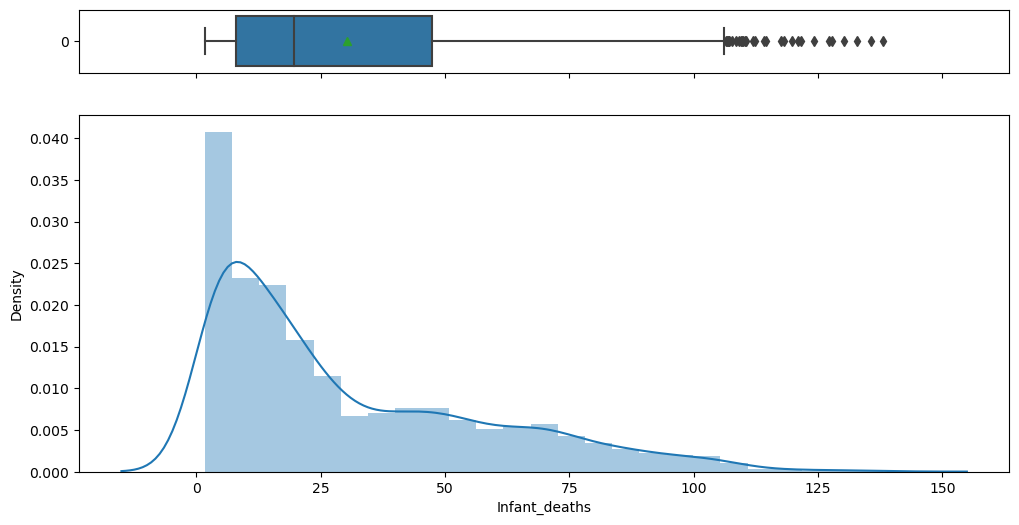

In [33]:
hist_box(df, 'Infant_deaths')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


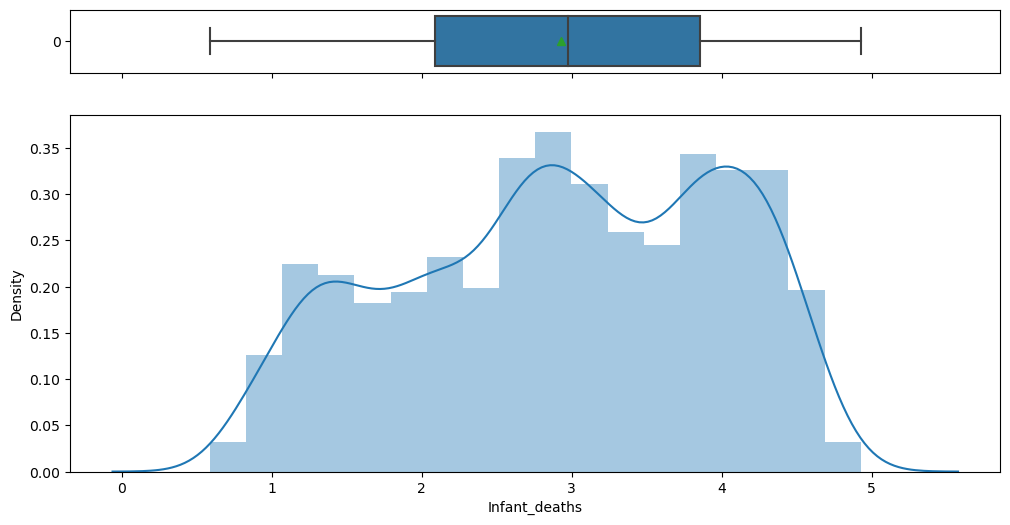

In [34]:
hist_box(df2, 'Infant_deaths')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


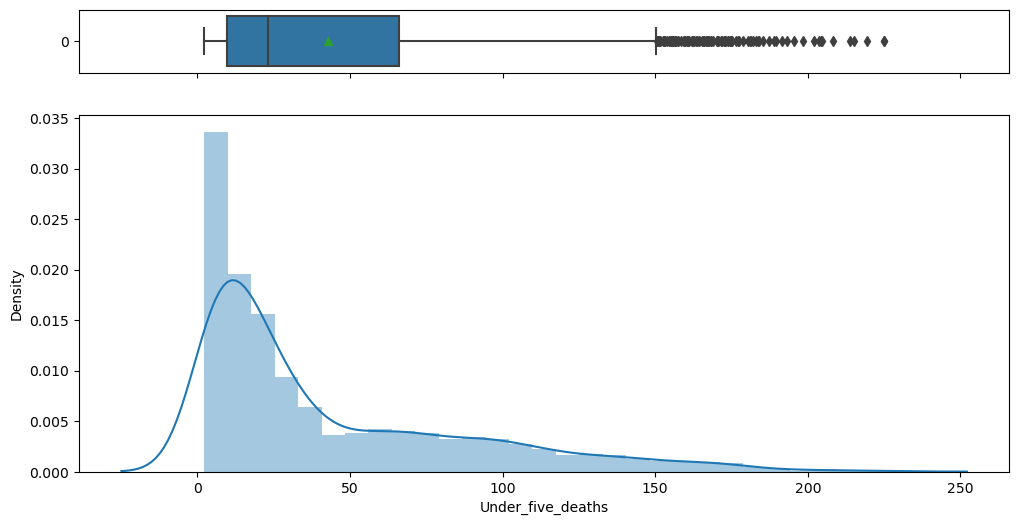

In [35]:
hist_box(df, 'Under_five_deaths')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


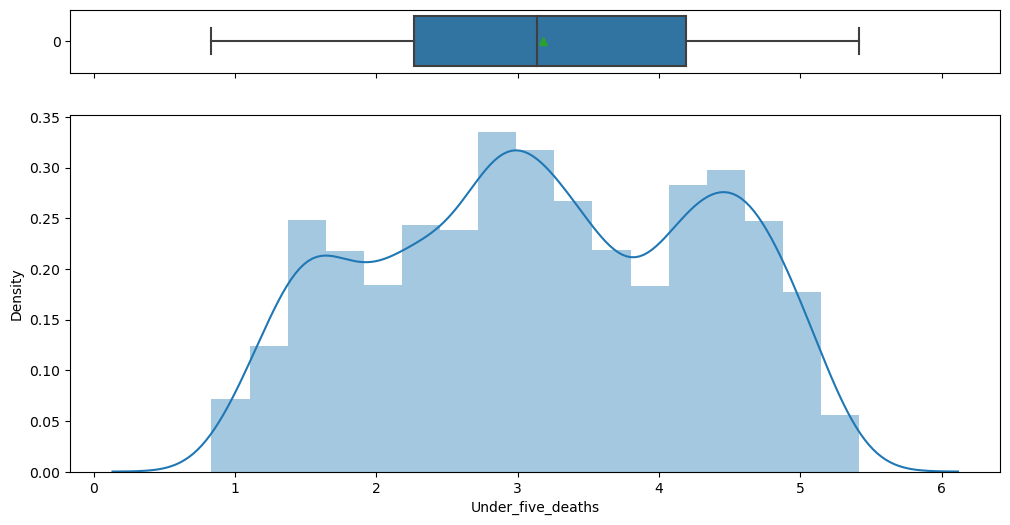

In [36]:
hist_box(df2, 'Under_five_deaths')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


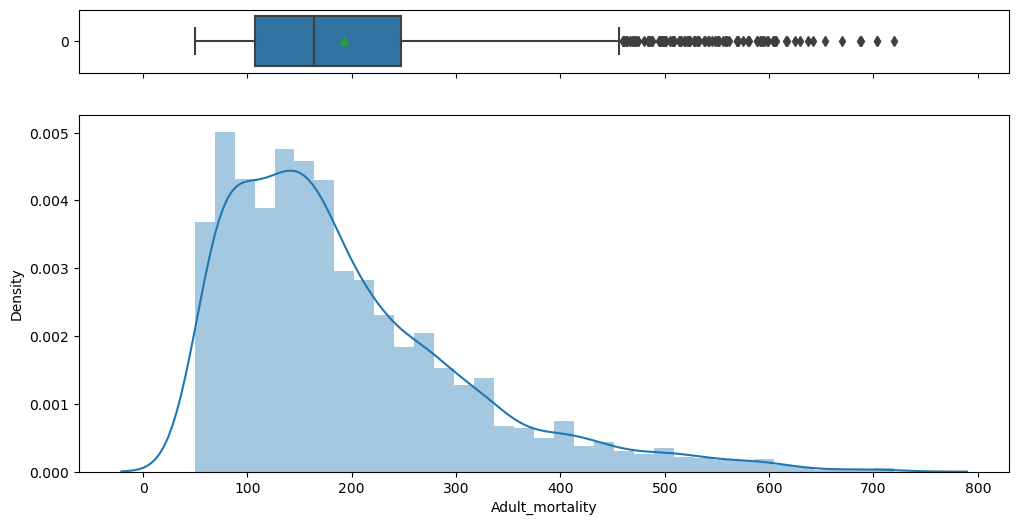

In [37]:
hist_box(df, 'Adult_mortality')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


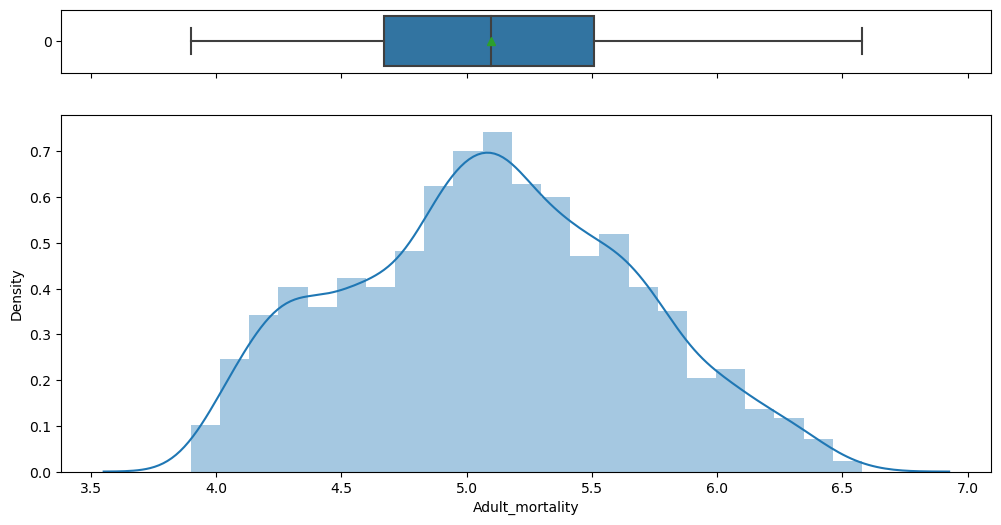

In [38]:
hist_box(df2, 'Adult_mortality')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


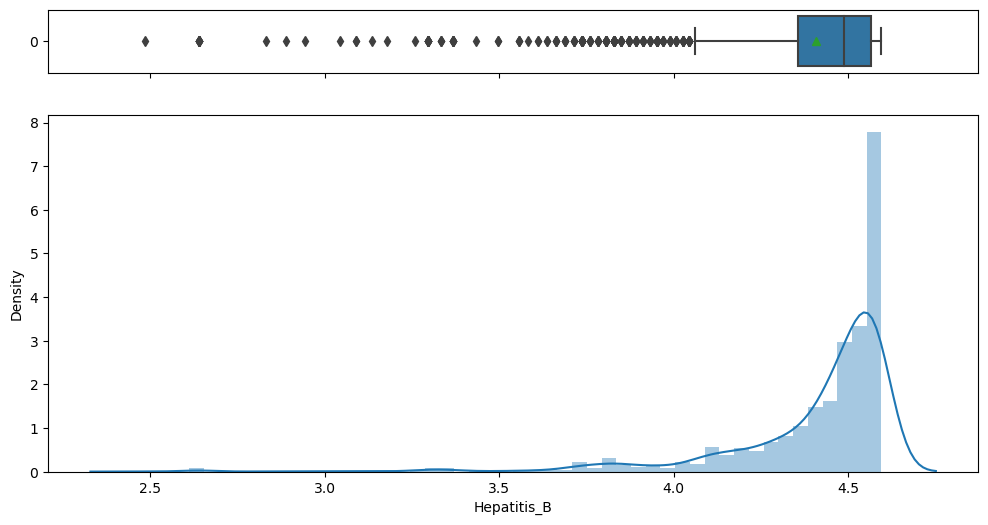

In [39]:
hist_box(df2, 'Hepatitis_B')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


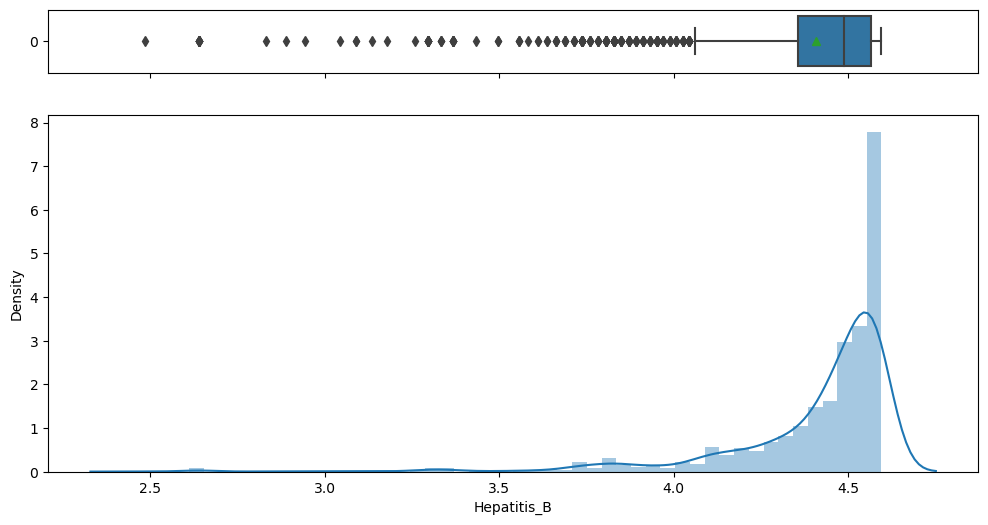

In [40]:
hist_box(df2, 'Hepatitis_B')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


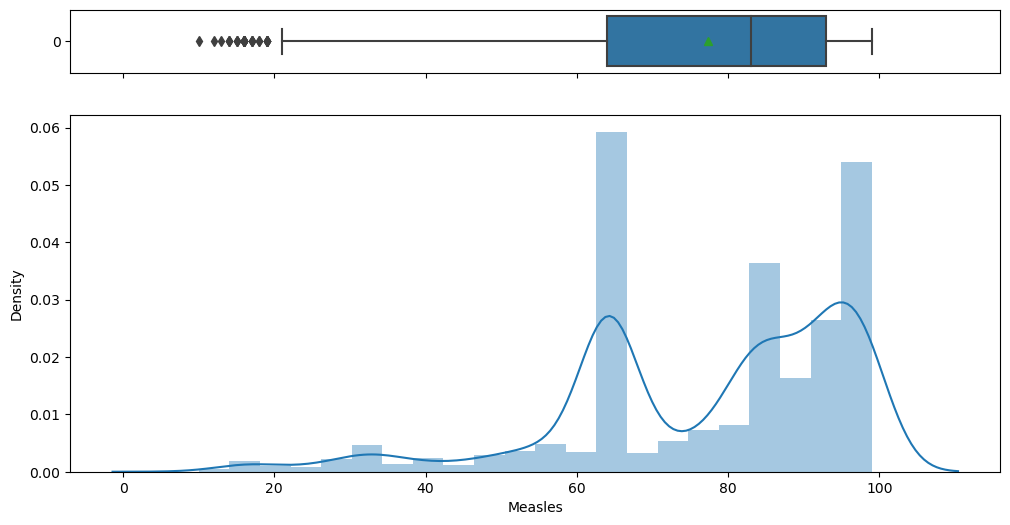

In [41]:
hist_box(df, 'Measles')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


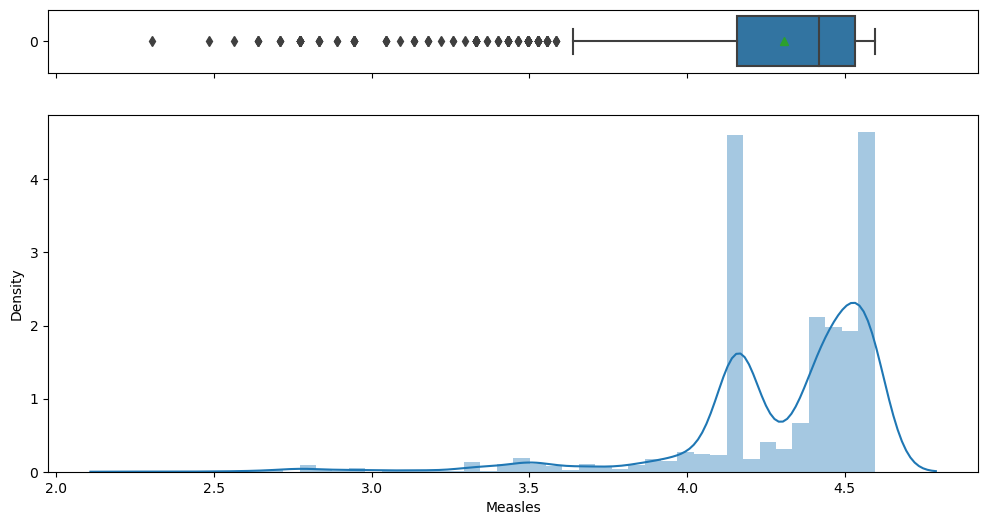

In [42]:
hist_box(df2, 'Measles')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


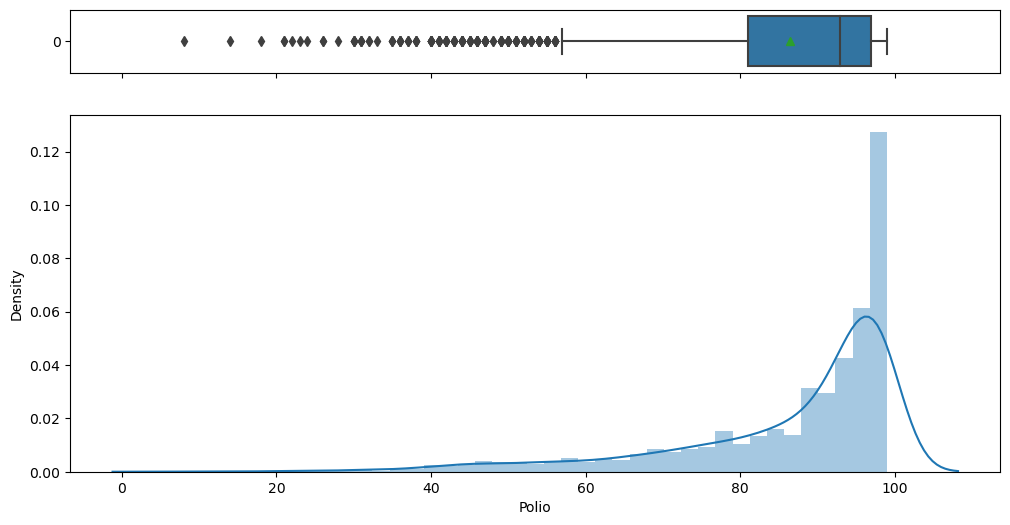

In [43]:
hist_box(df, 'Polio')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


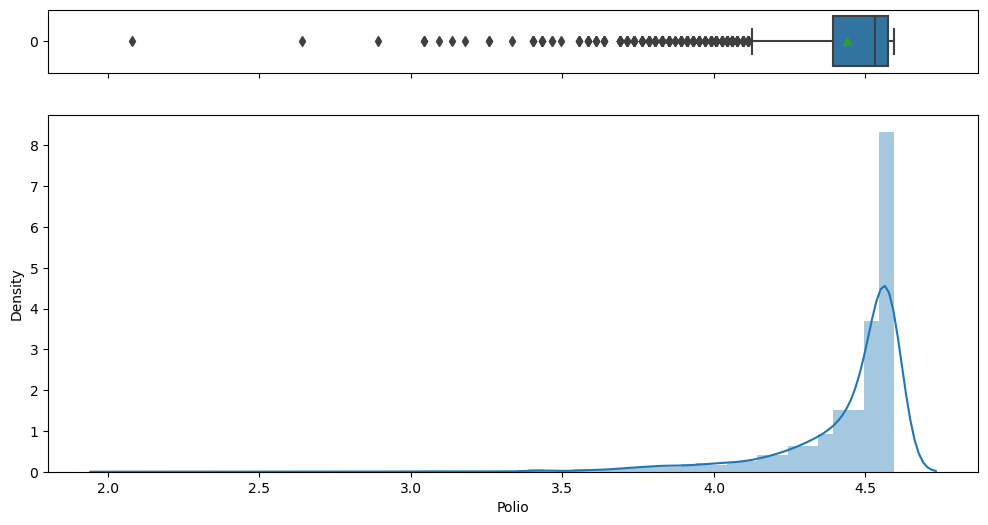

In [44]:
hist_box(df2, 'Polio')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


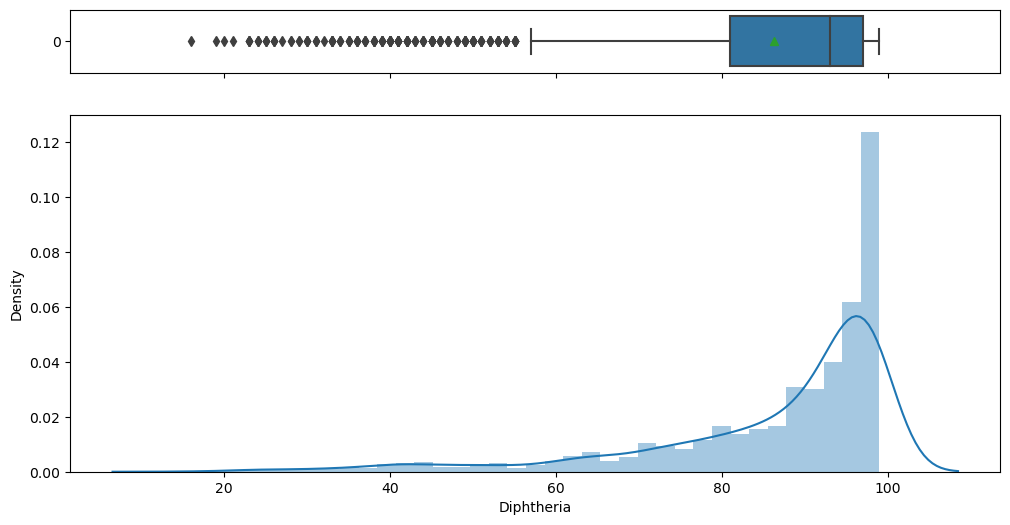

In [45]:
hist_box(df, 'Diphtheria')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


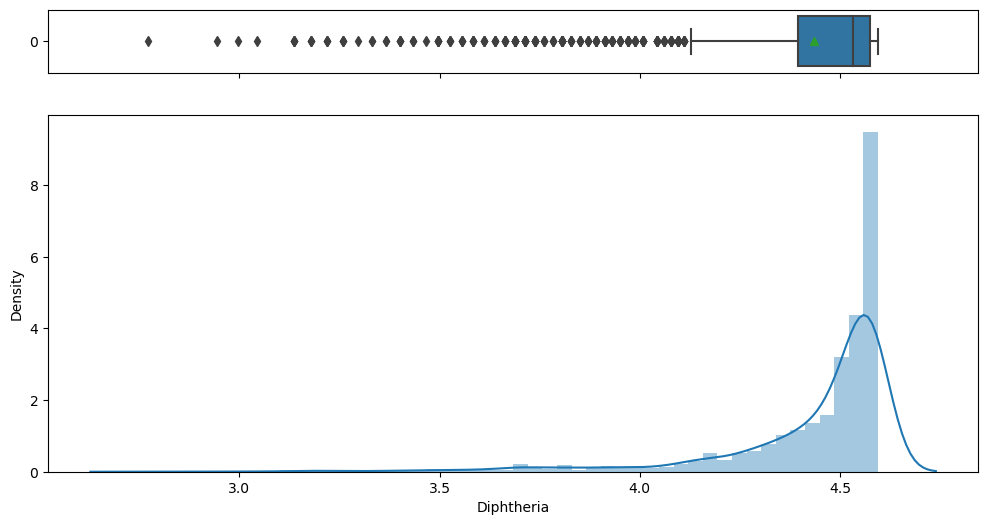

In [46]:
hist_box(df2, 'Diphtheria')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


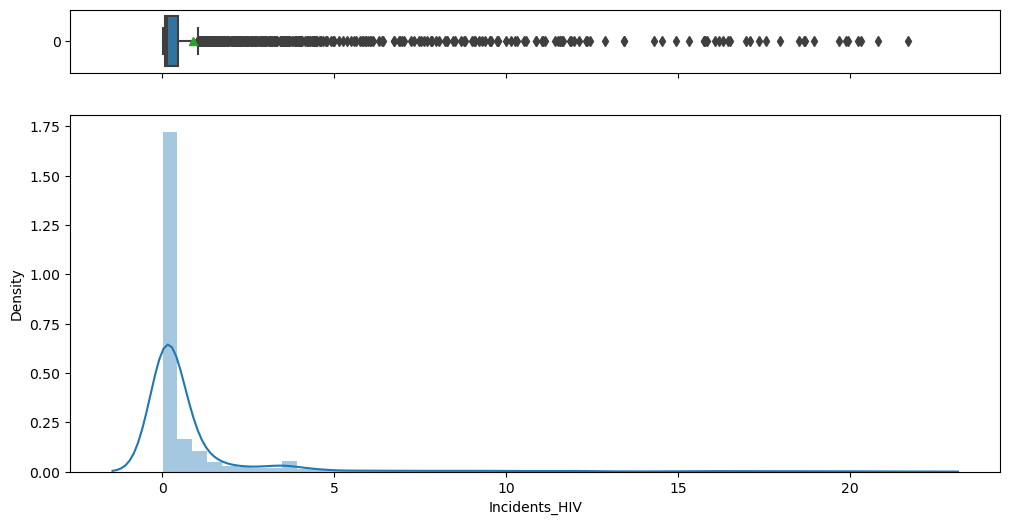

In [47]:
hist_box(df, 'Incidents_HIV')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


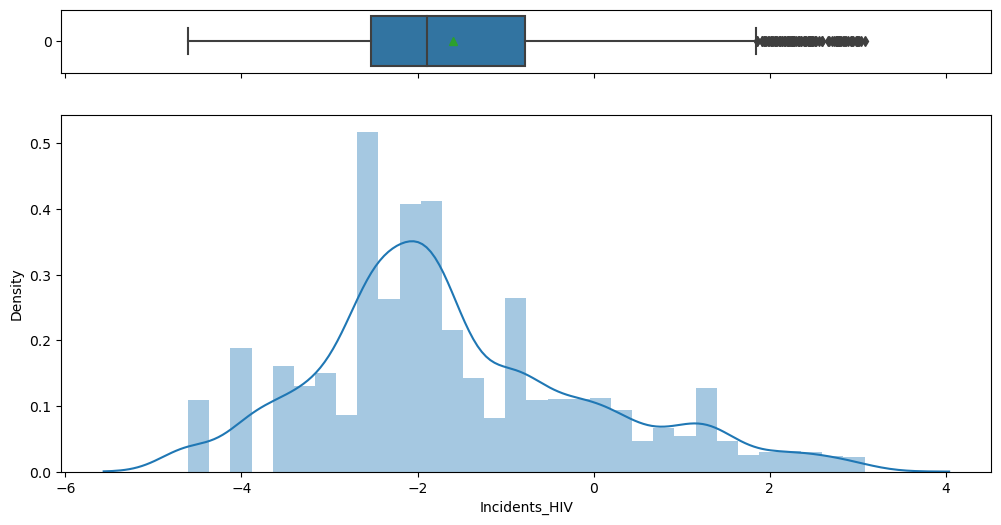

In [48]:
hist_box(df2, 'Incidents_HIV')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


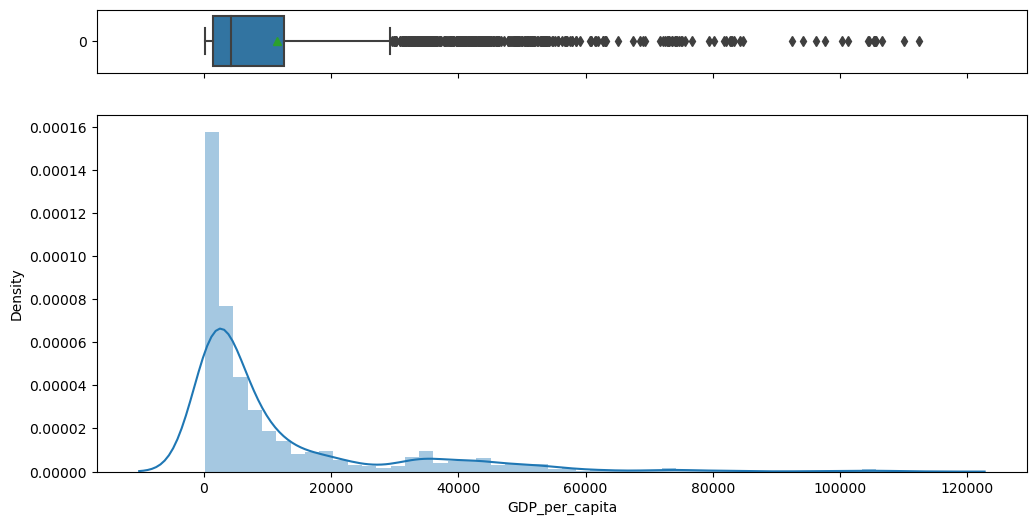

In [49]:
hist_box(df, 'GDP_per_capita')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


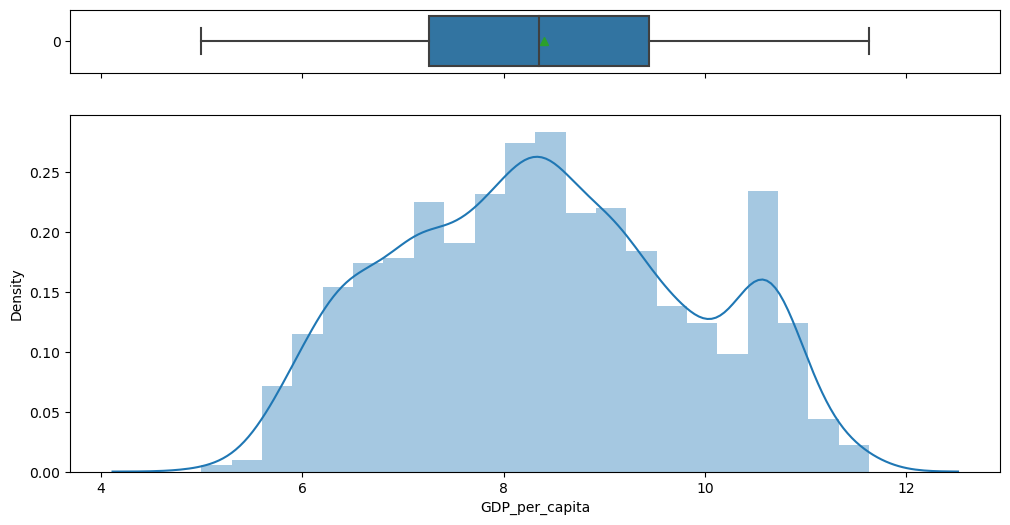

In [50]:
hist_box(df2, 'GDP_per_capita')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


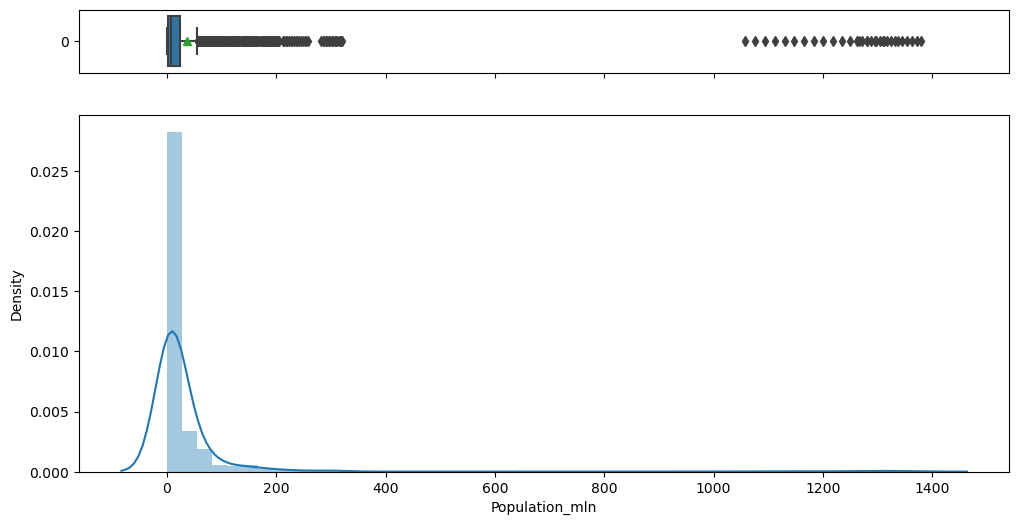

In [51]:
hist_box(df, 'Population_mln')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


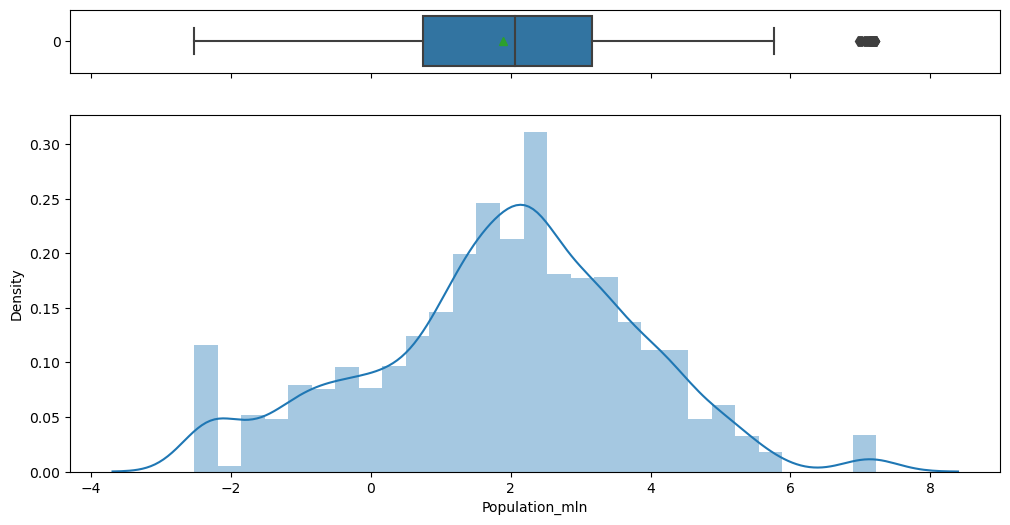

In [52]:
hist_box(df2, 'Population_mln')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


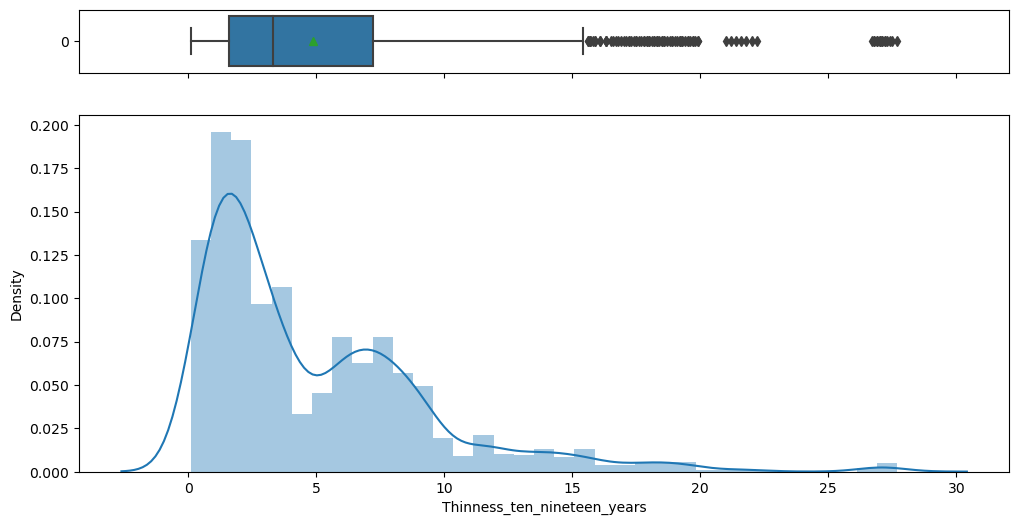

In [53]:
hist_box(df, 'Thinness_ten_nineteen_years')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


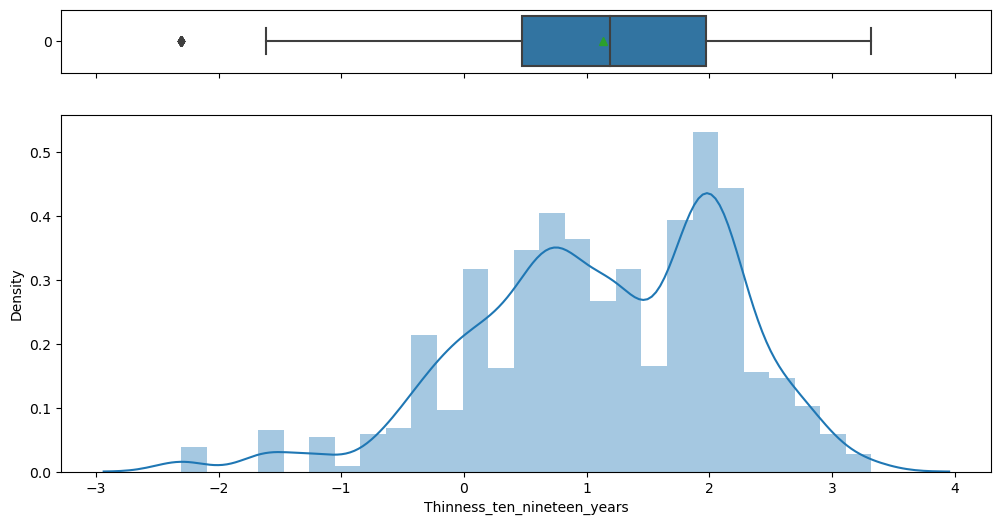

In [54]:
hist_box(df2, 'Thinness_ten_nineteen_years')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


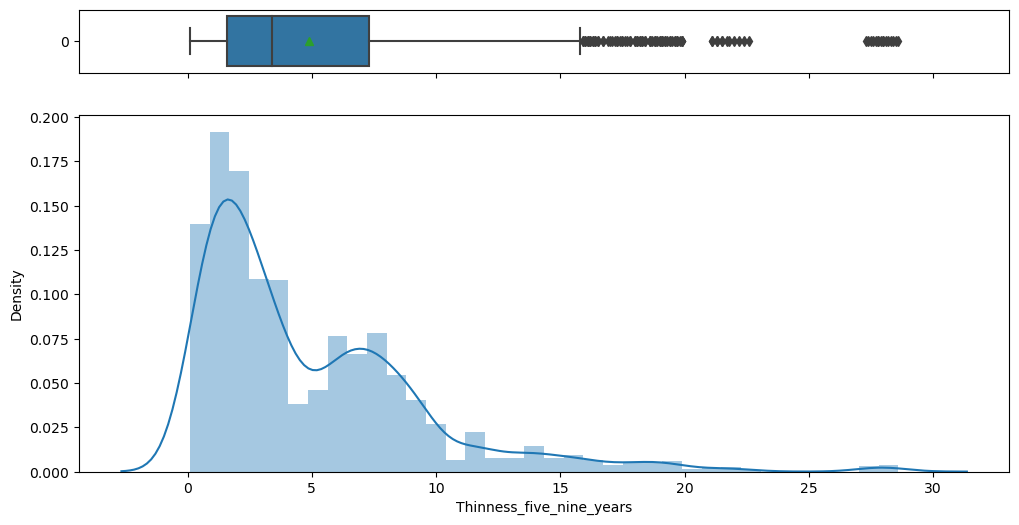

In [55]:
hist_box(df, 'Thinness_five_nine_years')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_43712\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


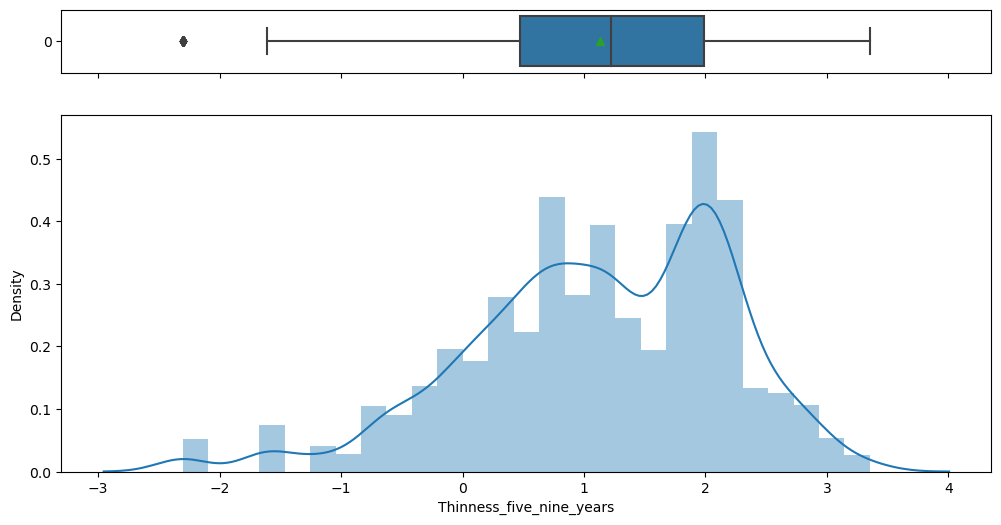

In [56]:
hist_box(df2, 'Thinness_five_nine_years')

### Dummy Variables

In [57]:
# Create dummy variables for 'Region'
region_dummies = pd.get_dummies(df2['Region'], prefix='Region')

# Create dummy variables for 'Year' less than 2010
year_dummies_less_2010 = pd.get_dummies(df2['Year'].loc[df2['Year'] < 2010], prefix='Year_less_2010')

# Create dummy variables for 'Year' greater than or equal to 2010
year_dummies_2010_and_greater = pd.get_dummies(df2['Year'].loc[df2['Year'] >= 2010], prefix='Year_2010_and_greater')

# Concatenate the dummy variables with the original DataFrame
df2 = pd.concat([df2, region_dummies, year_dummies_less_2010, year_dummies_2010_and_greater], axis=1)

# Show the updated DataFrame
print(df2)

        Country          Region  Year  Infant_deaths  Under_five_deaths  \
0       Turkiye     Middle East  2015       2.406945           2.564949   
1         Spain  European Union  2015       0.993252           1.193922   
2         India            Asia  2007       3.941582           4.218036   
3        Guyana   South America  2006       3.490429           3.701302   
4        Israel     Middle East  2012       1.223775           1.458615   
...         ...             ...   ...            ...                ...   
2859      Niger          Africa  2000       4.574711           5.415656   
2860   Mongolia            Asia  2009       3.173878           3.353407   
2861  Sri Lanka            Asia  2004       2.873565           3.363842   
2862  Lithuania  European Union  2002       2.066863           2.292535   
2863    Iceland  Rest of Europe  2011       0.741937           0.955511   

      Adult_mortality  Alcohol_consumption  Hepatitis_B   Measles   BMI  ...  \
0            4.6617

In [58]:
df2.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015       2.406945           2.564949   
1    Spain  European Union  2015       0.993252           1.193922   
2    India            Asia  2007       3.941582           4.218036   
3   Guyana   South America  2006       3.490429           3.701302   
4   Israel     Middle East  2012       1.223775           1.458615   

   Adult_mortality  Alcohol_consumption  Hepatitis_B   Measles   BMI  ...  \
0         4.661777                 1.32     4.574711  4.174387  27.8  ...   
1         4.058761                10.35     4.574711  4.543295  26.0  ...   
2         5.303685                 1.57     4.094345  3.555348  21.2  ...   
3         5.403562                 5.68     4.532599  4.304065  25.3  ...   
4         4.059598                 2.89     4.574711  4.488636  27.0  ...   

   Year_less_2010_2006  Year_less_2010_2007  Year_less_2010_2008  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  0.0                  1.0                  0.0   
3                  1.0                  0.0                  0.0   
4                  NaN                  NaN                  NaN   

   Year_less_2010_2009  Year_2010_and_greater_2010  \
0                  NaN                         0.0   
1                  NaN                         0.0   
2                  0.0                         NaN   
3                  0.0                         NaN   
4                  NaN                         0.0   

   Year_2010_and_greater_2011  Year_2010_and_greater_2012  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         0.0                         1.0   

   Year_2010_and_greater_2013  Year_2010_and_greater_2014  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         0.0                         0.0   

   Year_2010_and_greater_2015  
0                         1.0  
1                         1.0  
2                         NaN  
3                         NaN  
4                         0.0  

[5 rows x 46 columns]

In [59]:
for column in df2.columns:
    if 'Year_' in column:
        df2[column].fillna(df2[column].mode()[0], inplace=True)

# Verify that all null values are replaced
print(df2.isnull().sum())

Country                                 0
Region                                  0
Year                                    0
Infant_deaths                           0
Under_five_deaths                       0
Adult_mortality                         0
Alcohol_consumption                     0
Hepatitis_B                             0
Measles                                 0
BMI                                     0
Polio                                   0
Diphtheria                              0
Incidents_HIV                           0
GDP_per_capita                          0
Population_mln                          0
Thinness_ten_nineteen_years             0
Thinness_five_nine_years                0
Schooling                               0
Economy_status_Developed                0
Economy_status_Developing               0
Life_expectancy                         0
Region_Africa                           0
Region_Asia                             0
Region_Central America and Caribbe

In [60]:
df2.drop(['Region', 'Country', 'Year'], axis=1, inplace=True)

In [61]:
df2.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0       2.406945           2.564949         4.661777                 1.32   
1       0.993252           1.193922         4.058761                10.35   
2       3.941582           4.218036         5.303685                 1.57   
3       3.490429           3.701302         5.403562                 5.68   
4       1.223775           1.458615         4.059598                 2.89   

   Hepatitis_B   Measles   BMI     Polio  Diphtheria  Incidents_HIV  ...  \
0     4.574711  4.174387  27.8  4.574711    4.574711      -2.525729  ...   
1     4.574711  4.543295  26.0  4.574711    4.574711      -2.407946  ...   
2     4.094345  3.555348  21.2  4.204693    4.158883      -2.040221  ...   
3     4.532599  4.304065  25.3  4.521789    4.532599      -0.235722  ...   
4     4.574711  4.488636  27.0  4.543295    4.543295      -2.525729  ...   

   Year_less_2010_2006  Year_less_2010_2007  Year_less_2010_2008  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  1.0                  0.0   
3                  1.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   Year_less_2010_2009  Year_2010_and_greater_2010  \
0                  0.0                         0.0   
1                  0.0                         0.0   
2                  0.0                         0.0   
3                  0.0                         0.0   
4                  0.0                         0.0   

   Year_2010_and_greater_2011  Year_2010_and_greater_2012  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         1.0   

   Year_2010_and_greater_2013  Year_2010_and_greater_2014  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   Year_2010_and_greater_2015  
0                         1.0  
1                         1.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 43 columns]

### Remove Outliers

In [62]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

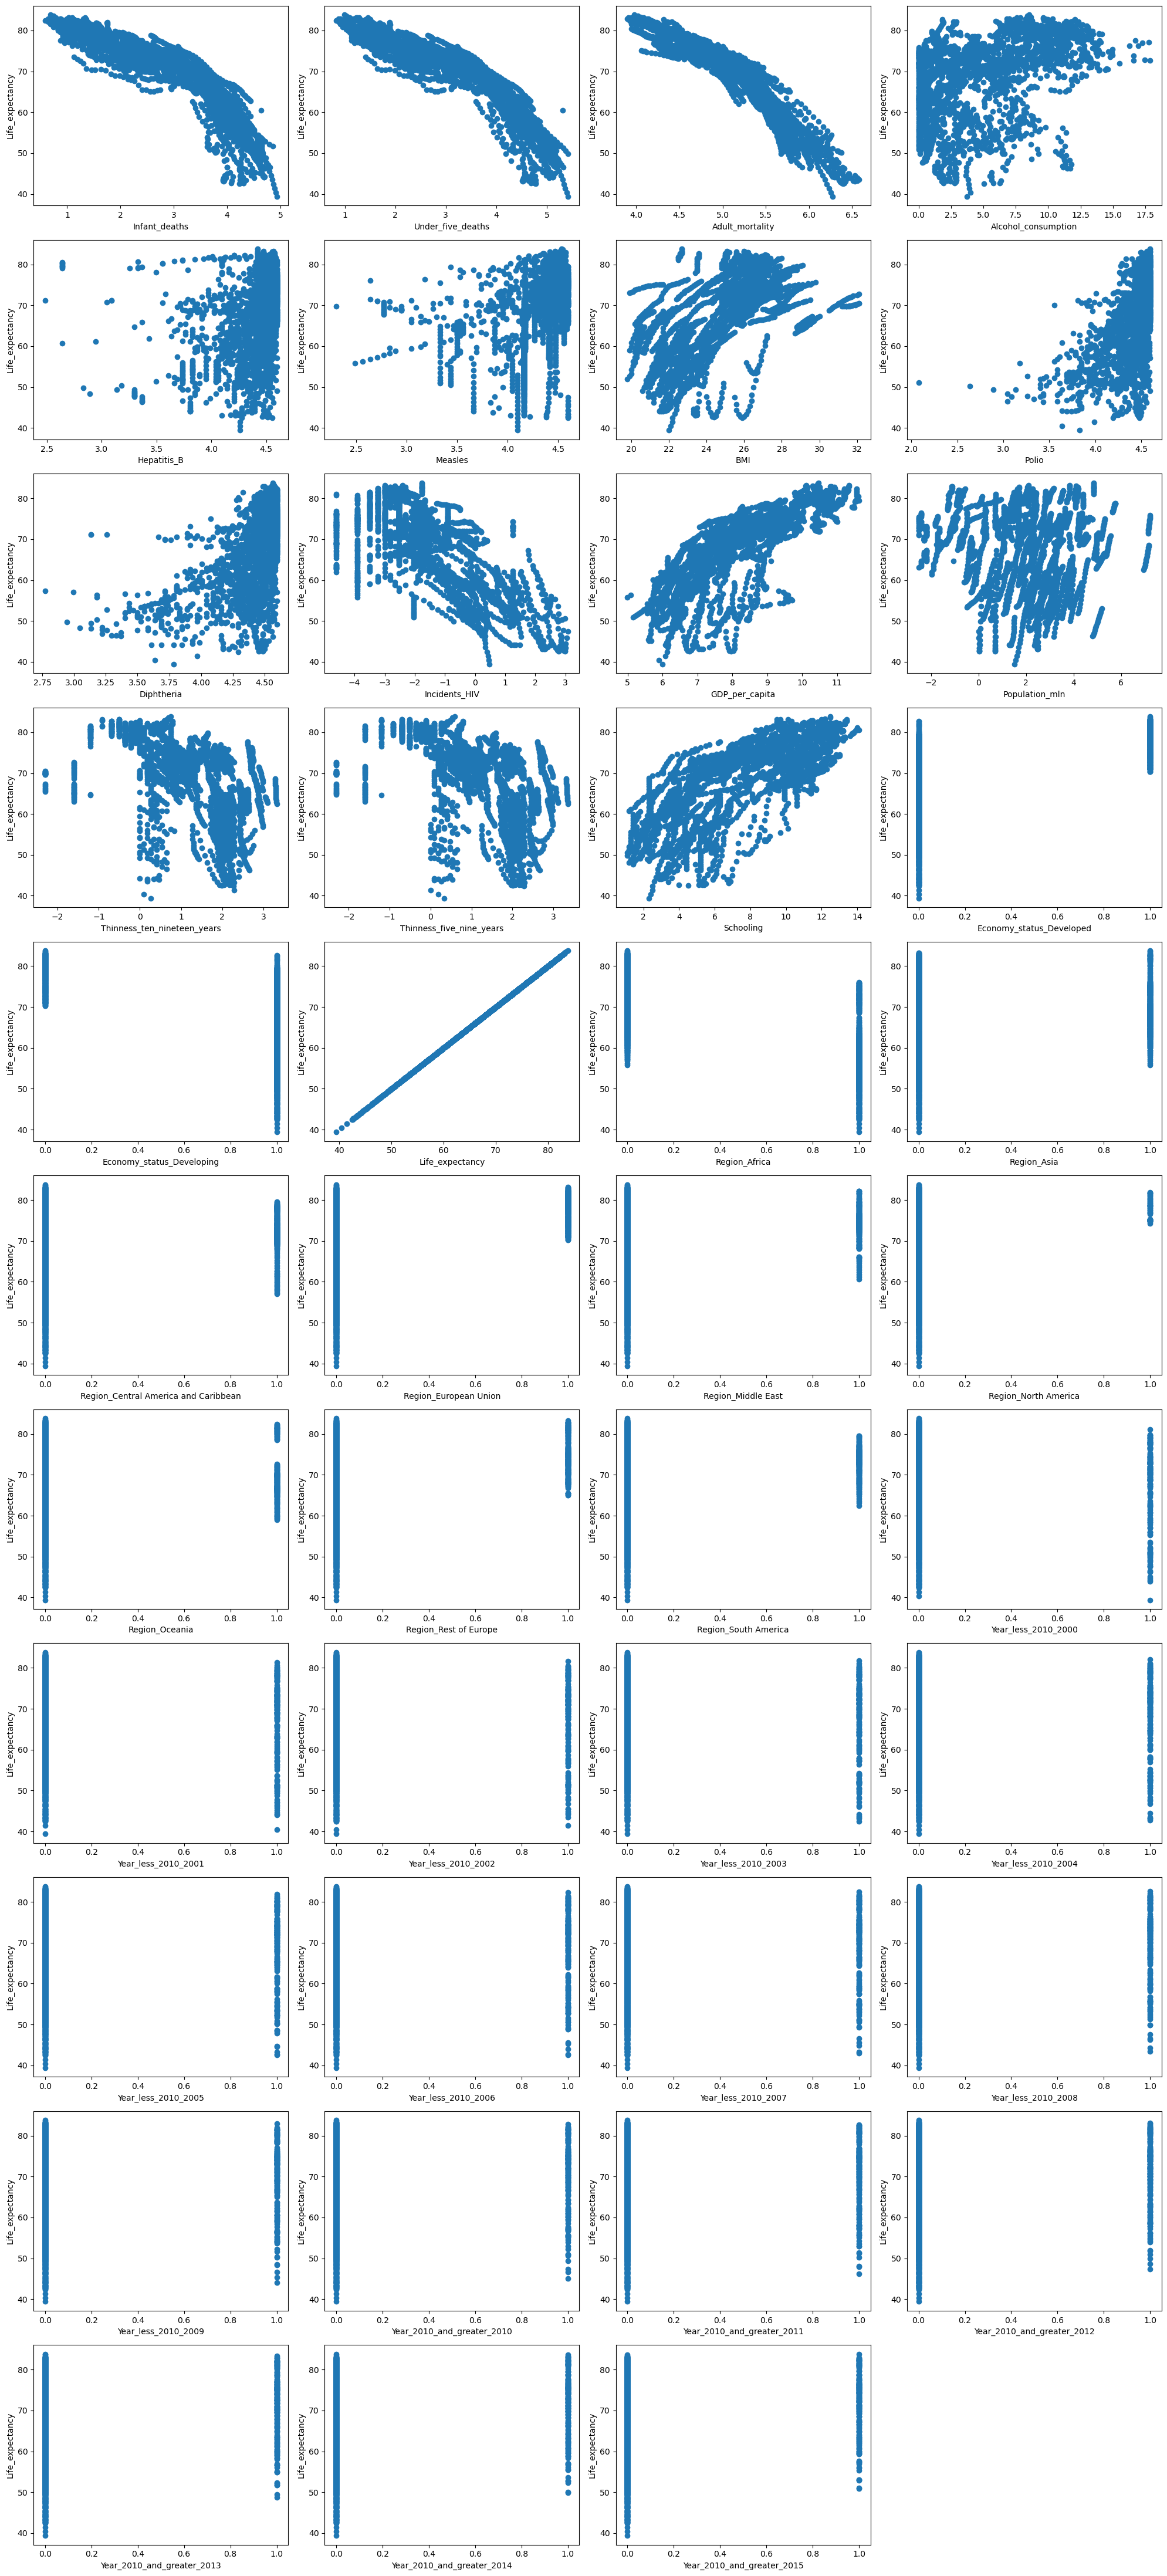

In [63]:


num_cols = len(df2.columns)
num_rows = (num_cols - 1) // 4 + 1

fig, axs = plt.subplots(num_rows, 4, figsize=(20, 4 * num_rows))
axs = axs.flatten()

# Iterate over the columns of the DataFrame and create scatter plots
columns = df2.columns
for i, col in enumerate(columns):
    axs[i].scatter(df2[col], df2['Life_expectancy'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Life_expectancy')

# Remove any unused subplots
for j in range(num_cols, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

### OLS Model

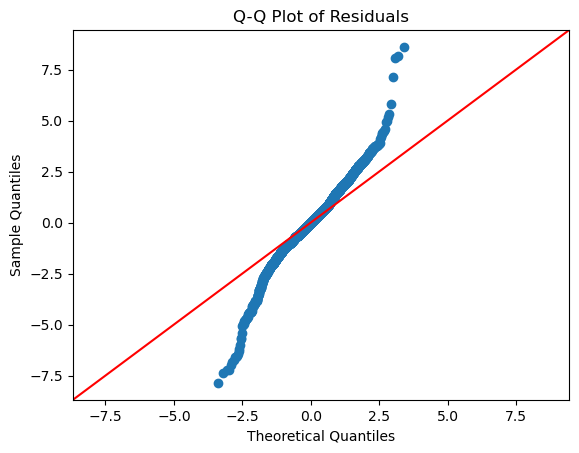

Regression Summary after Backward Elimination:
                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2712.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:04:53   Log-Likelihood:                -5449.7
No. Observations:                2864   AIC:                         1.097e+04
Df Residuals:                    2829   BIC:                         1.118e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [80]:
# Select all variables except for 'Life_expectancy'
independent_vars = df2.drop(columns=['Life_expectancy'])

# Prepare the data
X = independent_vars
y = df2['Life_expectancy']

# Add a constant term for the intercept in the model
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Get predicted values
predicted_values = results.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate residuals
residuals = y - predicted_values

# Create Q-Q plot of residuals
fig, ax = plt.subplots()
sm.qqplot(residuals, line='45', ax=ax)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Backward elimination to remove variables with p-value > 0.05
while results.pvalues.max() > 0.05:
    max_pvalue_index = results.pvalues.idxmax()
    X.drop(columns=[max_pvalue_index], inplace=True)
    model = sm.OLS(y, X)
    results = model.fit()

# Print the final regression summary after backward elimination
print("Regression Summary after Backward Elimination:")
print(results.summary())
# Print MSE and RMSE
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

### Observation
The OLS regression results show a well-fitted model for predicting "Life_expectancy" based on a set of 25 independent variables. The model has a R-squared value of 0.970, indicating that approximately 97% of the variance in life expectancy can be explained by the independent variables in the model. The adjusted R-squared value is also 0.970, suggesting that the model is not overfitting and accounts for the number of predictors.

The regression coefficients provide insights into the relationships between the independent variables and life expectancy. Some of the variables show strong positive associations with life expectancy, such as "Infant_deaths" and "Population_mln," while others have negative associations, such as "Under_five_deaths" and "Adult_mortality." These coefficients are statistically significant with very low p-values (P>|t|), indicating that these variables are highly relevant for predicting life expectancy.

However, it is essential to be cautious about interpreting the coefficient of the "const" (constant) term, as it represents the estimated value of "Life_expectancy" when all independent variables are zero, which may not have a meaningful real-world interpretation in this context.

The model also includes regional and economic status variables, indicating that different regions and economic statuses might have varying impacts on life expectancy.

One point of concern is the note at the end of the results, stating the presence of potential multicollinearity problems or a singular design matrix. Multicollinearity can affect the stability and interpretability of regression coefficients, which warrants further investigation and, if necessary, addressing the issue.

Overall, the model seems to have captured a significant amount of information to predict life expectancy accurately, but it is essential to validate the model on unseen data and address any potential issues before using it for practical applications.

### Iteration 3

Dropping of insignifcant variables
***

In [65]:
df3=df2.copy()

In [66]:
df3.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0       2.406945           2.564949         4.661777                 1.32   
1       0.993252           1.193922         4.058761                10.35   
2       3.941582           4.218036         5.303685                 1.57   
3       3.490429           3.701302         5.403562                 5.68   
4       1.223775           1.458615         4.059598                 2.89   

   Hepatitis_B   Measles   BMI     Polio  Diphtheria  Incidents_HIV  ...  \
0     4.574711  4.174387  27.8  4.574711    4.574711      -2.525729  ...   
1     4.574711  4.543295  26.0  4.574711    4.574711      -2.407946  ...   
2     4.094345  3.555348  21.2  4.204693    4.158883      -2.040221  ...   
3     4.532599  4.304065  25.3  4.521789    4.532599      -0.235722  ...   
4     4.574711  4.488636  27.0  4.543295    4.543295      -2.525729  ...   

   Year_less_2010_2006  Year_less_2010_2007  Year_less_2010_2008  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  1.0                  0.0   
3                  1.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   Year_less_2010_2009  Year_2010_and_greater_2010  \
0                  0.0                         0.0   
1                  0.0                         0.0   
2                  0.0                         0.0   
3                  0.0                         0.0   
4                  0.0                         0.0   

   Year_2010_and_greater_2011  Year_2010_and_greater_2012  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         1.0   

   Year_2010_and_greater_2013  Year_2010_and_greater_2014  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   Year_2010_and_greater_2015  
0                         1.0  
1                         1.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 43 columns]

### Backward Elimination
The code performs backward elimination to create a parsimonious regression model for predicting 'Life_expectancy' using selected independent variables from "df3." It iteratively removes less significant variables based on p-values until all coefficients are statistically significant (p ≤ 0.05). The final regression summary is printed, providing insights into the significant independent variables' influence on 'Life_expectancy.' Backward elimination simplifies the model and identifies critical factors impacting life expectancy.

In [67]:
dependent_var = 'Life_expectancy'

# Select relevant columns as independent variables
independent_vars = [col for col in df3.columns if col != dependent_var]

# Prepare the data
X = df3[independent_vars]
y = df3[dependent_var]

# Add a constant term for the intercept in the model
X = sm.add_constant(X)

# Fit the initial model
model = sm.OLS(y, X)
results = model.fit()

# Perform backward elimination
while results.pvalues.max() > 0.05:
    max_pvalue_col = results.pvalues.idxmax()
    X.drop(max_pvalue_col, axis=1, inplace=True)
    model = sm.OLS(y, X)
    results = model.fit()

# Print the final regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2712.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:05:17   Log-Likelihood:                -5449.7
No. Observations:                2864   AIC:                         1.097e+04
Df Residuals:                    2829   BIC:                         1.118e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Scatter Plot

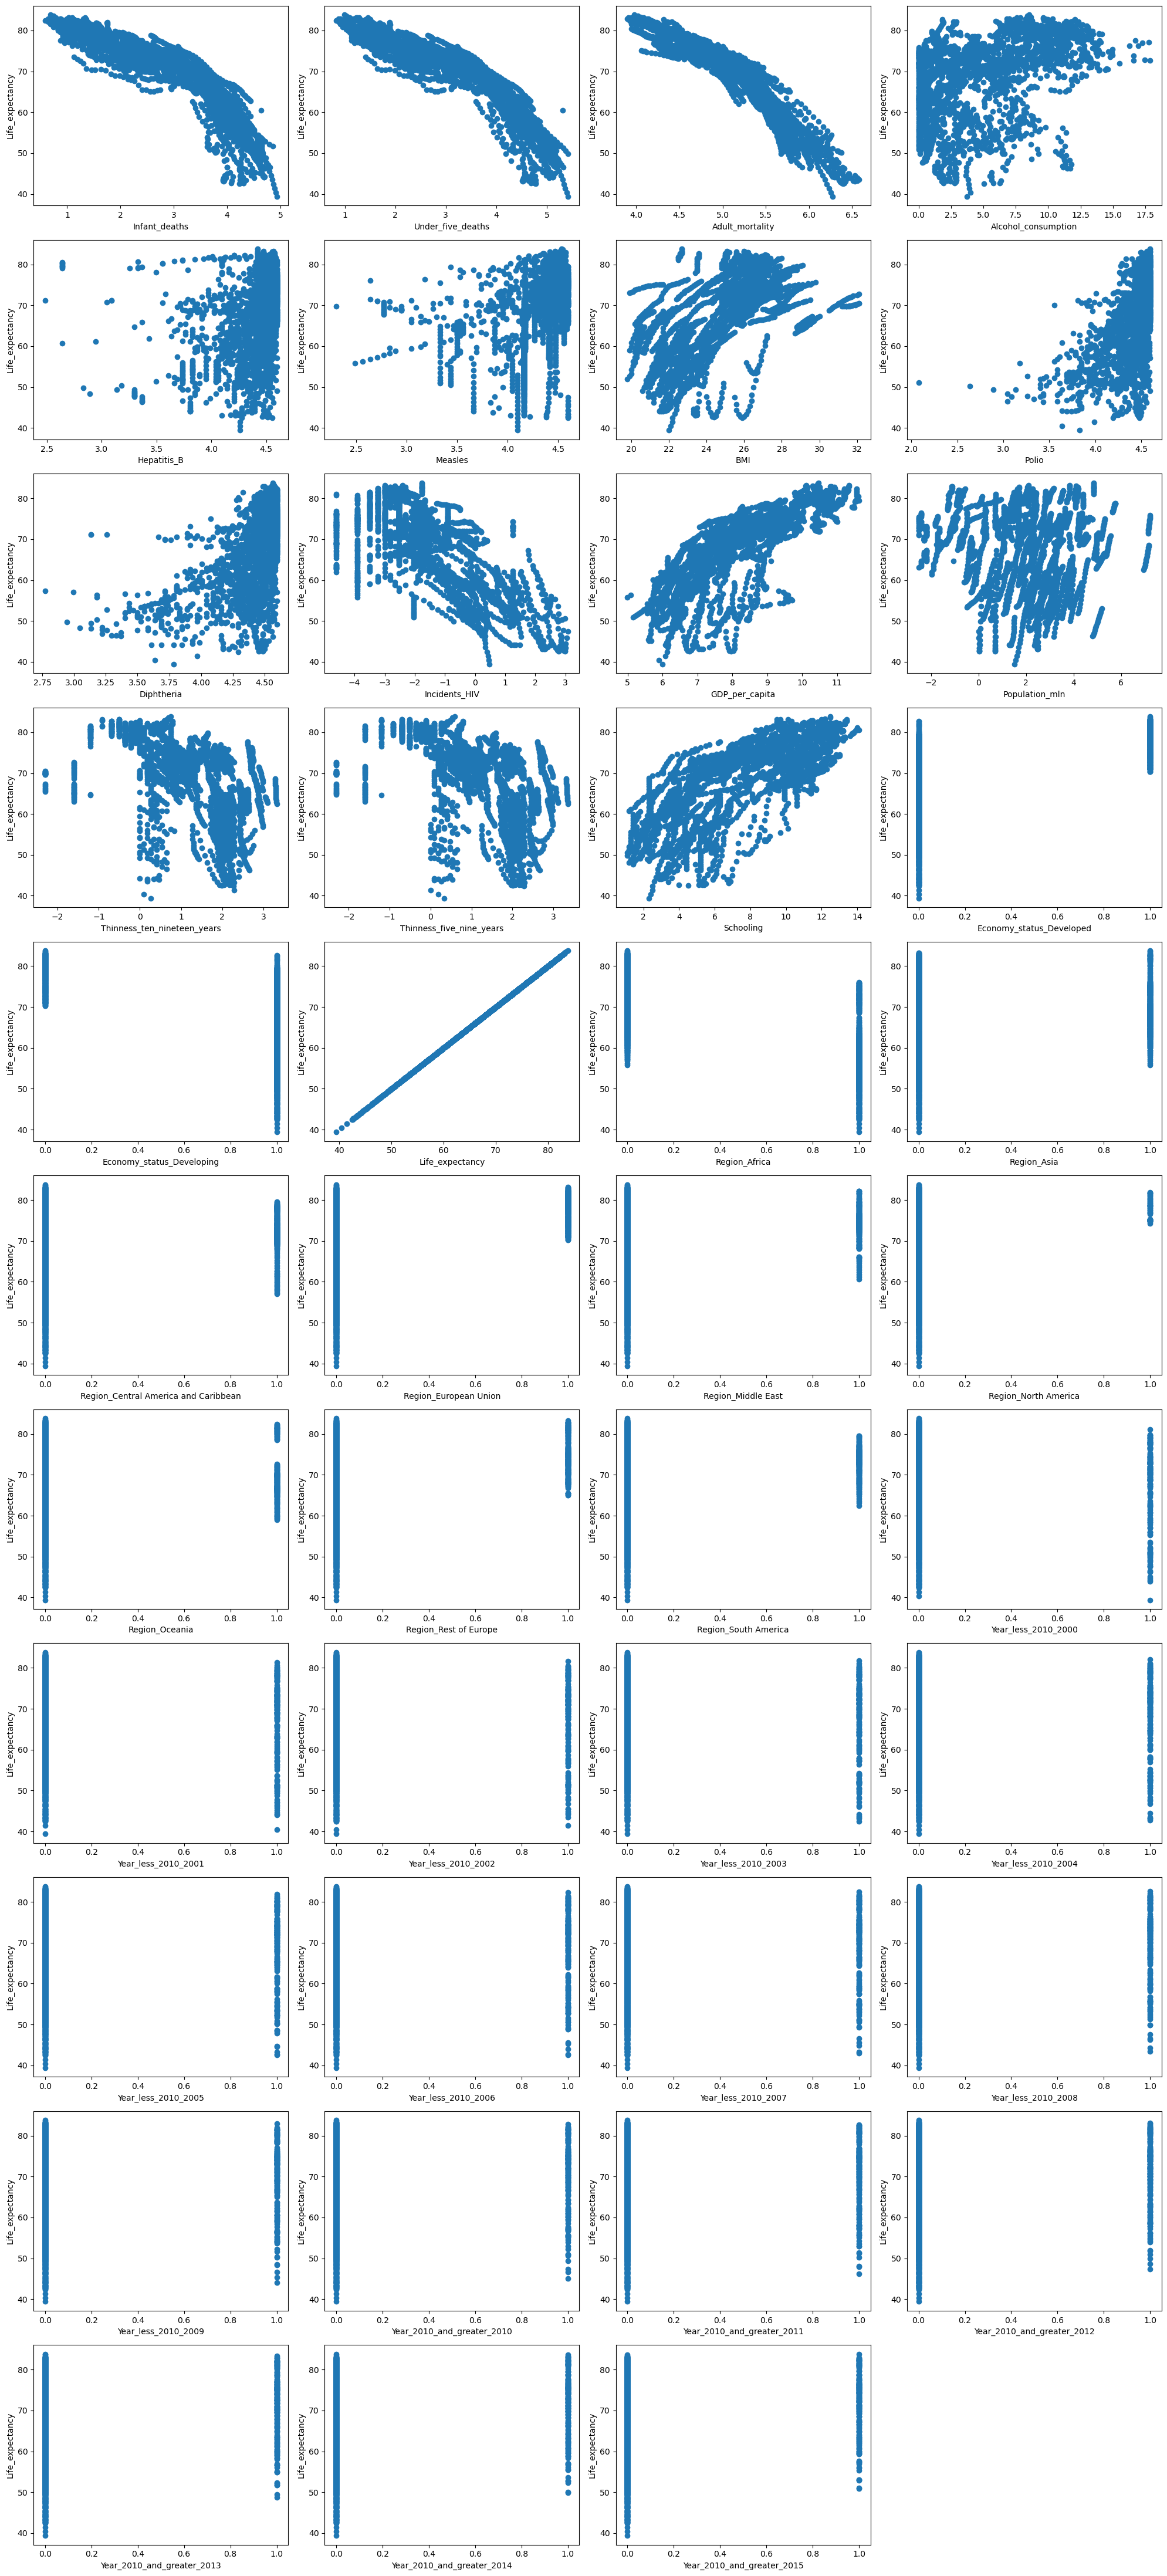

In [69]:
num_cols = len(df3.columns)
num_rows = (num_cols - 1) // 4 + 1

fig, axs = plt.subplots(num_rows, 4, figsize=(20, 4 * num_rows))
axs = axs.flatten()

# Iterate over the columns of the DataFrame and create scatter plots
columns = df3.columns
for i, col in enumerate(columns):
    axs[i].scatter(df3[col], df3['Life_expectancy'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Life_expectancy')

# Remove any unused subplots
for j in range(num_cols, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

### Correlation Matrix
The code calculates and visualizes the correlation matrix heatmap between 'Life_expectancy' and each independent variable in "df3." It helps identify critical factors impacting life expectancy, aiding data-driven decision-making in public health policies.

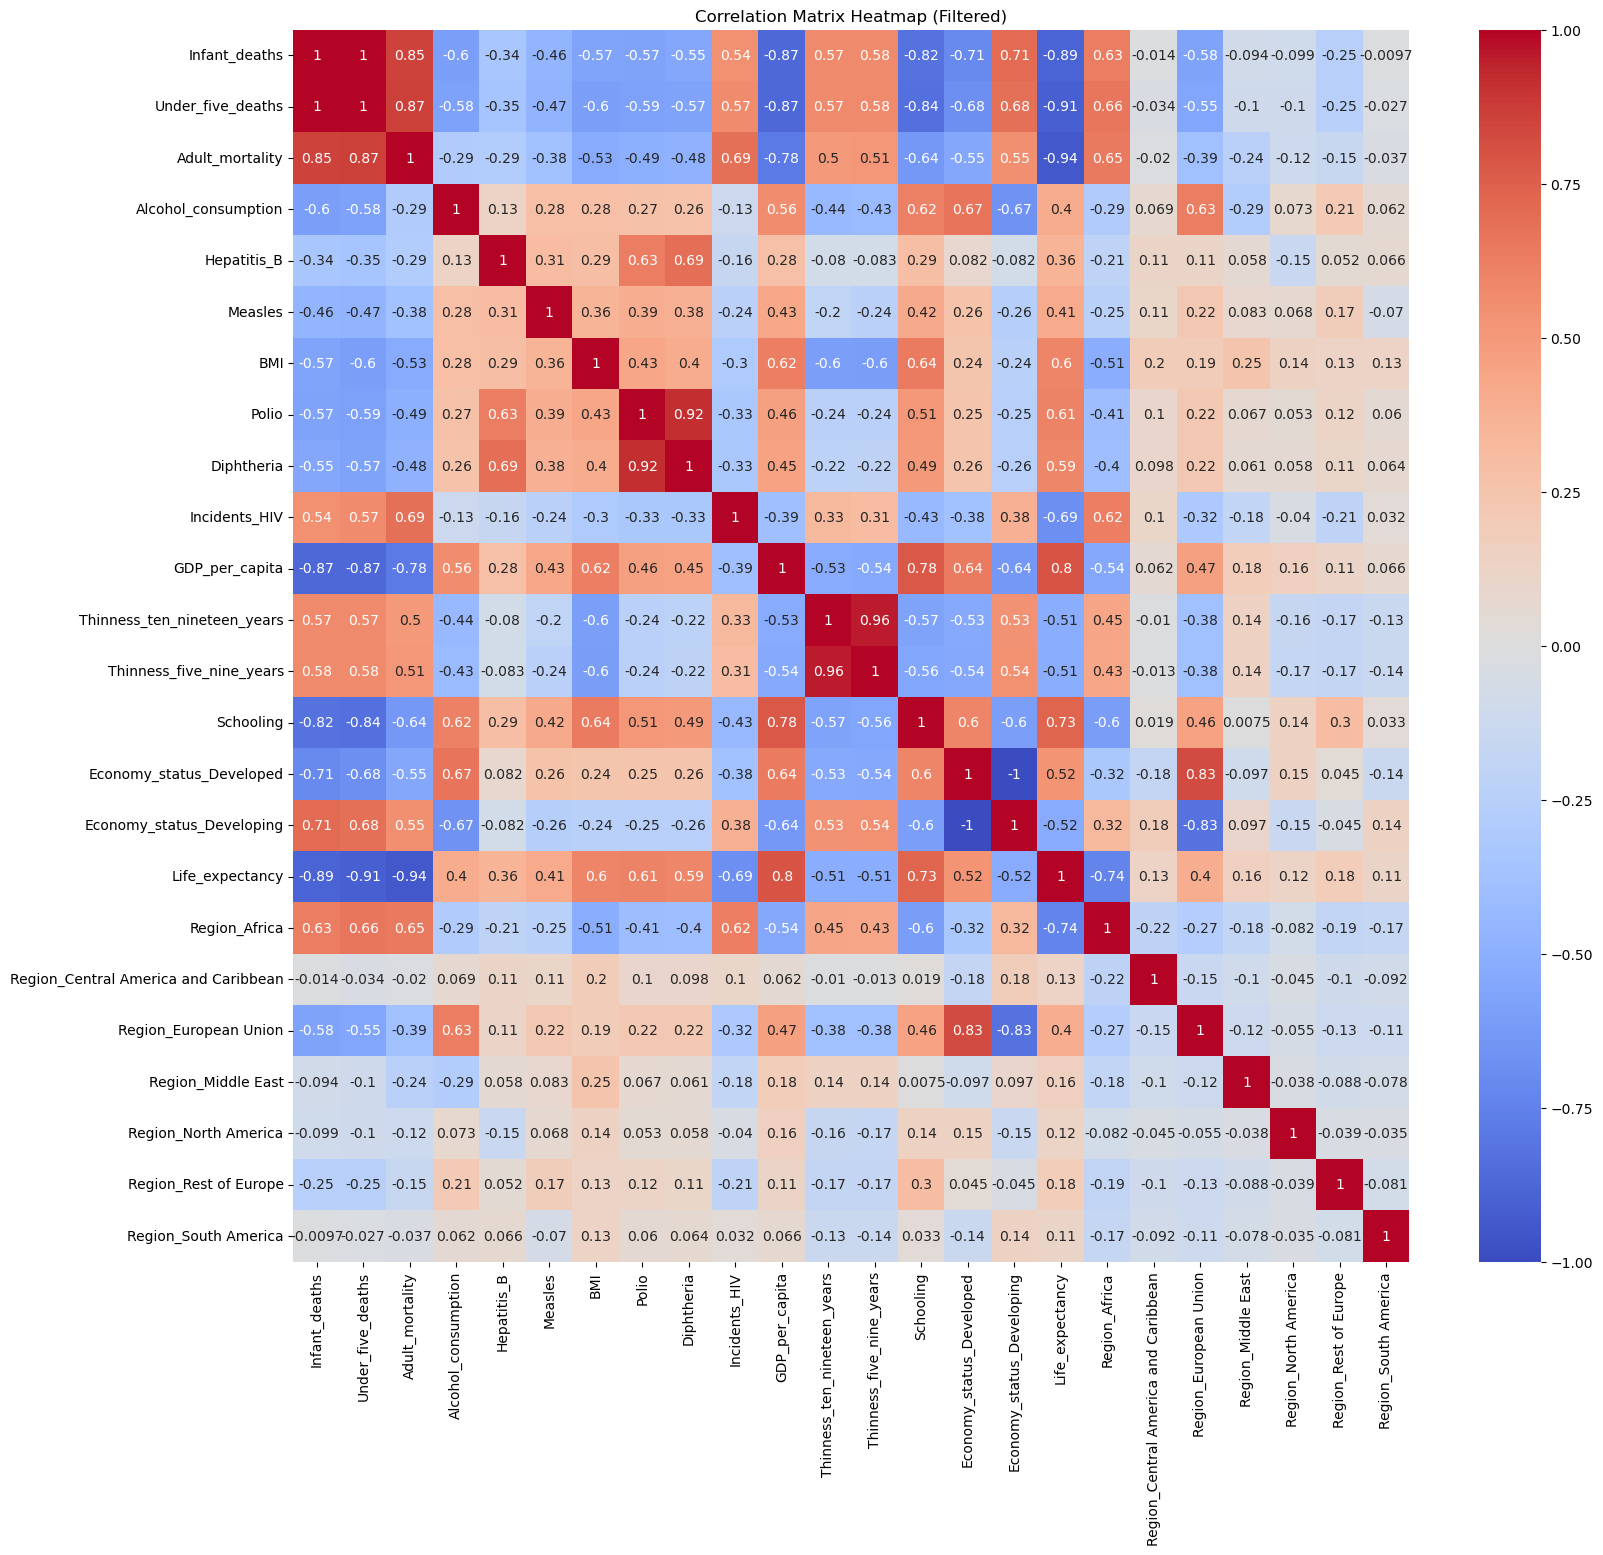

In [75]:
# Calculate the correlation between 'Life_expectancy' and each independent variable
correlations = df3.corr()['Life_expectancy']

# Set the threshold for weak correlation (you can adjust this value as needed)
threshold = 0.1

# Filter out the independent variables with weak correlation
strong_correlations = correlations[abs(correlations) >= threshold]

# Select only the columns with strong correlations in the DataFrame
df3_filtered = df3[strong_correlations.index]

# Calculate the correlation matrix of the filtered DataFrame
corr_matrix_filtered = df3_filtered.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap (Filtered)")
plt.show()

In [76]:
# Filter out the independent variables with low correlation
low_correlations = correlations[abs(correlations) < threshold]

In [77]:
df3 = df3.drop(columns=low_correlations.index)

In [78]:
df3.head()

Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0       2.406945           2.564949         4.661777                 1.32   
1       0.993252           1.193922         4.058761                10.35   
2       3.941582           4.218036         5.303685                 1.57   
3       3.490429           3.701302         5.403562                 5.68   
4       1.223775           1.458615         4.059598                 2.89   

   Hepatitis_B   Measles   BMI     Polio  Diphtheria  Incidents_HIV  ...  \
0     4.574711  4.174387  27.8  4.574711    4.574711      -2.525729  ...   
1     4.574711  4.543295  26.0  4.574711    4.574711      -2.407946  ...   
2     4.094345  3.555348  21.2  4.204693    4.158883      -2.040221  ...   
3     4.532599  4.304065  25.3  4.521789    4.532599      -0.235722  ...   
4     4.574711  4.488636  27.0  4.543295    4.543295      -2.525729  ...   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  \
0                         0                          1             76.5   
1                         1                          0             82.8   
2                         0                          1             65.4   
3                         0                          1             67.0   
4                         1                          0             81.7   

   Region_Africa  Region_Central America and Caribbean  Region_European Union  \
0              0                                     0                      0   
1              0                                     0                      1   
2              0                                     0                      0   
3              0                                     0                      0   
4              0                                     0                      0   

   Region_Middle East  Region_North America  Region_Rest of Europe  \
0                   1                     0                      0   
1                   0                     0                      0   
2                   0                     0                      0   
3                   0                     0                      0   
4                   1                     0                      0   

   Region_South America  
0                     0  
1                     0  
2                     0  
3                     1  
4                     0  

[5 rows x 24 columns]

# OLS Model

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2772.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:06:54   Log-Likelihood:                -5461.6
No. Observations:                2864   AIC:                         1.099e+04
Df Residuals:                    2830   BIC:                         1.119e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


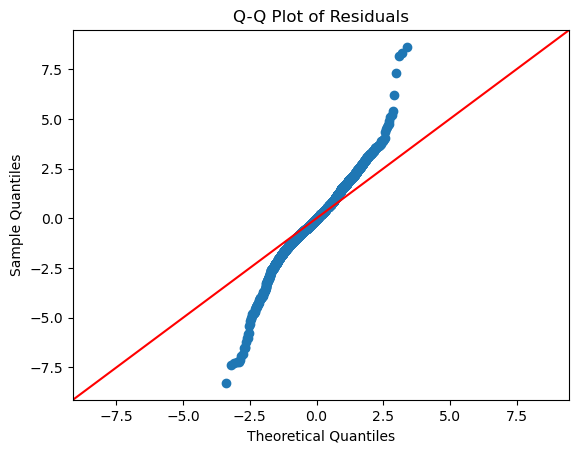

In [72]:
# Prepare the data for the OLS model (excluding the specified variables)
X = df3.drop(columns=['Life_expectancy', 'Hepatitis_B','Diphtheria' , 'BMI', 'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years'])
y = df3['Life_expectancy']

# Add a constant term for the intercept in the model
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X)
results = model.fit()

# Print regression summary
print(results.summary())

# Calculate predicted values
predicted_values = results.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predicted_values)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y, predicted_values, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Create Q-Q plot of residuals
residuals = y - predicted_values
fig, ax = plt.subplots()
sm.qqplot(residuals, line='45', ax=ax)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

### Train and Test

In [73]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for both training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (MSE) on training set:", mse_train)
print("Mean Squared Error (MSE) on test set:", mse_test)

# Check for overfitting or underfitting
if mse_train < mse_test:
    print("The model may be overfitting as MSE on training set is lower than MSE on test set.")
elif mse_train > mse_test:
    print("The model may be underfitting as MSE on training set is higher than MSE on test set.")
else:
    print("The model is performing similarly on both training and test sets.")

Mean Squared Error (MSE) on training set: 2.662335085476454
Mean Squared Error (MSE) on test set: 2.644710972568126
The model may be underfitting as MSE on training set is higher than MSE on test set.


### Observation:

The OLS regression results show that the model has a high R-squared value of 0.960, indicating that approximately 96% of the variance in the dependent variable 'Life_expectancy' is explained by the independent variables. The F-statistic is significant with a probability close to zero, indicating that the overall model is statistically significant.

The model's Mean Squared Error (MSE) on the training set is 3.5064, and the Root Mean Squared Error (RMSE) is approximately 1.8726. The lower the MSE and RMSE, the better the model's performance.

However, there might be a concern of underfitting as the MSE on the training set is higher than the MSE on the test set, indicating that the model is not capturing the underlying patterns in the data well enough. This could be due to the exclusion of some variables, leading to potential omitted variable bias or underrepresentation of non-linear relationships.

To improve the model, you may consider exploring the possibility of including additional relevant variables or performing feature engineering to better capture the complexity of the relationship between the independent variables and the dependent variable 'Life_expectancy.' Additionally, considering interactions between certain variables or exploring non-linear relationships might be beneficial in enhancing the model's performance.

# Recommendation:

Based on the regression results, we can draw the following insights to improve life expectancy across countries:

Focus on Reducing Infant and Under-Five Deaths: Efforts to decrease infant and under-five mortality rates can have a significant positive impact on life expectancy.

Address Adult Mortality: Implement strategies to tackle adult mortality, as it strongly influences life expectancy.

Encourage Responsible Alcohol Consumption: Promote awareness and policies for responsible alcohol consumption, as it appears to have a positive association with life expectancy.

Improve Immunization Coverage: Enhance immunization programs to combat diseases like measles and polio, which have a negative impact on life expectancy.

Combat Incidents of HIV: Implement effective measures to reduce HIV incidents, as it is negatively correlated with life expectancy.

Strengthen Healthcare Infrastructure in Developing Countries: Developing economies should focus on enhancing their healthcare infrastructure and services to improve life expectancy.

Consider Regional Differences: Tailor health interventions based on specific regional needs, considering the impact of regional factors on life expectancy.

Monitor and Address Economic Status: Economically developed and developing countries should continue monitoring and improving their economic status to support better health outcomes.

Pay Attention to Time Trends: Identify and address time-specific factors affecting life expectancy to stay proactive in improving health outcomes.

It is essential to note that these recommendations should be considered alongside other factors, such as cultural, social, and environmental aspects, for a comprehensive approach to improving life expectancy globally.